<a href="https://colab.research.google.com/github/braille-NLA-dissertation-OxfordMaths/braille-NLA-code-master-final/blob/main/braille_NLA_dissertation_OxMaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing initial set up of required library packages**

In [ ]:
# Import NumPy #
import numpy as np
# Import all comps stats packages from SciPy's tutorial on LA #
import time 
import os
import sys
import glob
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

# Import all Linear Algebra tools in numpy including SVD #
from numpy.linalg import svd
from numpy.linalg import matrix_rank as rank
from scipy.linalg import diagsvd

%matplotlib inline
%precision 4
plt.style.use('ggplot')

**How many combinations of unique Braille cells are there in total?**

In [ ]:
## Number of combinations of unique Braille cells ##

comb = [0] *7
n = 6
c = 0

while(c<7):
  for i in range(7):
    comb[c] = math.factorial(n)/(math.factorial(i)*math.factorial(n - i))
    c = c + 1

print("\033[1;36;47m")
print("Combinations list: ", comb, "\n")
print("Total number of unqiue Braille cells : ", round(sum(comb)))


Combinations list:  [1.0, 6.0, 15.0, 20.0, 15.0, 6.0, 1.0] 

Total number of unqiue Braille cells :  64


**Creating own set of matrix grids for visualisation**

In [ ]:
def matrixGrid(x):
  x_round = x.round(decimals=0)
  x_int = x_round.astype(int)
  dataFrame = pd.DataFrame(x_int)
  dataFrameStyle = dataFrame.style.background_gradient(cmap=plt.cm.prism, 
                                                       axis=None)
  display(dataFrameStyle)

def matrixGridSolType1(x):
  x_round = x.round(decimals=0)
  x_int = x_round.astype(int)
  dataFrame = pd.DataFrame(x_int)
  dataFrameStyle = dataFrame.style.background_gradient(cmap=plt.cm.flag, 
                                                       axis=None)
  display(dataFrameStyle)

def matrixGridSolType2(x):
  x_round = x.round(decimals=0)
  x_int = x_round.astype(int)
  dataFrame = pd.DataFrame(x_int)
  dataFrameStyle = dataFrame.style.background_gradient(cmap=plt.cm.rainbow_r, 
                                                       axis=None)
  display(dataFrameStyle)

def matrixGridRound(x):
  x_round = x.round(decimals=3)
  dataFrame = pd.DataFrame(x_round)
  dataFrameStyle = dataFrame.style.background_gradient(cmap=plt.cm.prism, 
                                                       axis=None)
  display(dataFrameStyle)

def matrixGridRoundCol(x):
  x_round = x.round(decimals=3)
  dataFrame = pd.DataFrame(x_round)
  dataFrameStyle = dataFrame.style.background_gradient(cmap=plt.cm.seismic_r, 
                                                       axis=None)
  display(dataFrameStyle)

In [ ]:
def gameLayout_colFlag(x):
  fig_x = plt.imshow(x, cmap = plt.cm.flag)
  plt.axis('off')
  fig_x.axes.get_xaxis().set_visible(False)
  fig_x.axes.get_yaxis().set_visible(False)

def gameLayout_colRainbow(x):
  fig_x = plt.imshow(x, cmap = plt.cm.rainbow)
  plt.axis('off')
  fig_x.axes.get_xaxis().set_visible(False)
  fig_x.axes.get_yaxis().set_visible(False)

def gameLayout_colCubehelix(x):
  fig_x = plt.imshow(x, cmap = plt.cm.cubehelix_r)
  plt.axis('off')
  fig_x.axes.get_xaxis().set_visible(False)
  fig_x.axes.get_yaxis().set_visible(False)

def gameLayout_colTerrain(x):
  fig_x = plt.imshow(x, cmap = plt.cm.terrain_r)
  plt.axis('off')
  fig_x.axes.get_xaxis().set_visible(False)
  fig_x.axes.get_yaxis().set_visible(False)

def gameLayout_colRainbowR(x):
  fig_x = plt.imshow(x, cmap = plt.cm.gist_rainbow)
  plt.axis('off')
  fig_x.axes.get_xaxis().set_visible(False)
  fig_x.axes.get_yaxis().set_visible(False)

**Teaching mathematics in Braille** 

*   Corresponds to ***Section 2.2*** in dissertation

*   Corresponds to ***Section 3.1*** in dissertation
  







In [ ]:
## Constructing Braille Nemeth code numbers as dense matrices ## 
cell_11 = np.array([1, 1])
cell_21 = np.array([2, 1])
cell_12 = np.array([1, 2])
cell_22 = np.array([2, 2])

zero = np.array([cell_11, cell_12, cell_22])
one = np.array([cell_11, cell_21, cell_11])
two = np.array([cell_11, cell_21, cell_21])
three = np.array([cell_11, cell_22, cell_11])
four = np.array([cell_11, cell_22, cell_12])
five = np.array([cell_11, cell_21, cell_12])
six = np.array([cell_11, cell_22, cell_21])
seven = np.array([cell_11, cell_22, cell_22])
eight = np.array([cell_11, cell_21, cell_22])
nine = np.array([cell_11, cell_12, cell_21])

# Constructing list 'numbers' that includes all the numbers #
numbers = [zero, one, two, three, four, five, six, seven, eight, nine]

# Showing examples for number '0' and '10' #
print("\033[1;33;40m Key: \033[0;32;47m Green shaded numbers - "
"\033[0;30;47m raised Braille dot | \033[0;31;47m Red shaded numbers - "
"\033[0;30;47m not raised \n")

print("\033[1;36;47m Example 1: matrix for number \033[1;34;47m 0 \n")
matrixGrid(numbers[0])

print("\n \033[1;36;47m Example 2: matrix for number \033[1;34;47m 10 \n")
matrixGrid(np.hstack((numbers[1], numbers[0])))

 Key:  Green shaded numbers -  raised Braille dot |  Red shaded numbers -  not raised 

 Example 1: matrix for number  0 



,0,1
0,1,1
1,1,2
2,2,2



  Example 2: matrix for number  10 



,0,1,2,3
0,1,1,1,1
1,2,1,1,2
2,1,1,2,2


 Key:
 Green shaded numbers -  raised Braille dot
 Red shaded numbers -  not raised 

' 0 + 4 '  in Braille Nemeth code: 



,0,1,2,3,4,5
0,1,1,1,2,1,1
1,1,2,1,1,2,2
2,2,2,2,2,1,2


 
 ' 8 - 5 '  in Braille Nemeth code: 



,0,1,2,3,4,5
0,1,1,1,1,1,1
1,2,1,1,1,2,1
2,2,2,2,2,1,2



 ' 1 x 2 '  in Braille Nemeth code: 



,0,1,2,3,4,5,6,7
0,1,1,1,2,2,1,1,1
1,2,1,1,1,1,1,2,1
2,1,1,1,1,1,2,2,1



 ' 2 ÷ 1 '  in Braille Nemeth code: 



,0,1,2,3,4,5,6,7
0,1,1,1,2,1,2,1,1
1,2,1,1,1,1,1,2,1
2,2,1,1,2,2,1,1,1



 ' 100 + 100 '  in Braille Nemeth code: 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,1,1,1,2,1,1,1,1,1,1
1,2,1,1,2,1,2,1,1,2,1,1,2,1,2
2,1,1,2,2,2,2,2,2,1,1,2,2,2,2



 ' 100 x 100 '  in Braille Nemeth code: 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1
1,2,1,1,2,1,2,1,1,1,1,2,1,1,2,1,2
2,1,1,2,2,2,2,1,1,1,2,1,1,2,2,2,2


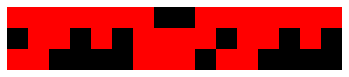

In [ ]:
## Arithmetic (add, subtract, multiply, divide) via Braille Nemeth code ##

# equals, plus, minus, multiply, divide signs from Nemeth Braille → matrices #

equals = np.hstack((np.array([cell_12, cell_11, cell_12]), 
                    np.array([cell_21, cell_11, cell_21])))
plus = np.array([cell_12, cell_11, cell_22])
minus = np.array([cell_11, cell_11, cell_22])
multiply = np.hstack((np.array([cell_12, cell_11, cell_11]), 
                    np.array([cell_21, cell_11, cell_12])))
divide = np.hstack((np.array([cell_12, cell_11, cell_12]), 
                    np.array([cell_12, cell_11, cell_21])))

# Key for diagrams # 
print("\033[1;33;40m Key:")
print("\033[0;32;47m Green shaded numbers - \033[0;34;47m raised Braille dot")
print("\033[0;31;47m Red shaded numbers - \033[0;34;47m not raised \n")

# Add '0 + 4' written using Braille Nemeth code #
plus_04_nemeth = np.hstack((numbers[0], plus, numbers[4]))
print("\033[1;34;47m' 0 + 4 ' \033[1;32;47m in Braille Nemeth code: \n")
matrixGrid(plus_04_nemeth)
gameLayout_colFlag(plus_04_nemeth)
plt.savefig('plus_04_nemeth.png', bbox_inches='tight', pad_inches = 0)

# Subtract '8 - 5' using Braille Nemeth code #
minus_85_nemeth = np.hstack((numbers[8], minus, numbers[5]))
print(" \n \033[1;34;47m' 8 - 5 ' \033[1;32;47m in Braille Nemeth code: \n")
matrixGrid(minus_85_nemeth)
gameLayout_colFlag(minus_85_nemeth)
plt.savefig('minus_85_nemeth.png', bbox_inches='tight', pad_inches = 0)

# Multiply '1 x 2' using Braille Nemeth code  #
multiply_12_nemeth = np.hstack((numbers[1], multiply, numbers[2]))
print("\n \033[1;34;47m' 1 x 2 ' \033[1;32;47m in Braille Nemeth code: \n")
matrixGrid(multiply_12_nemeth)
gameLayout_colFlag(multiply_12_nemeth)
plt.savefig('multiply_12_nemeth.png', bbox_inches='tight', pad_inches = 0)

# Divide '2 ÷ 1' Braille Nemeth code #
divide_21_nemeth = np.hstack((numbers[2], divide, numbers[1]))
print("\n \033[1;34;47m' 2 ÷ 1 ' \033[1;32;47m in Braille Nemeth code: \n")
matrixGrid(divide_21_nemeth)
gameLayout_colFlag(divide_21_nemeth)
plt.savefig('divide_21_nemeth.png', bbox_inches='tight', pad_inches = 0)

# Add '100 + 100' as example why SVD is better as math level advances # 
plus_100_100_nemeth = np.hstack((numbers[1], numbers[0], numbers[0], 
                               plus, numbers[1], numbers[0], numbers[0]))
print("\n \033[1;34;47m' 100 + 100 ' \033[1;32;47m in Braille Nemeth code: \n")
matrixGrid(plus_100_100_nemeth)
gameLayout_colFlag(plus_100_100_nemeth)
plt.savefig('plus_100_100_nemeth.png', bbox_inches='tight', pad_inches = 0)

# Multiply '100 x 100' as example of 'x' and '÷' workaround for Hadamard # 
multiply_100x100_nemeth = np.hstack((numbers[1], numbers[0], numbers[0], 
                               multiply, numbers[1], numbers[0], numbers[0]))
print("\n \033[1;34;47m' 100 x 100 ' \033[1;32;47m in Braille Nemeth code: \n")
matrixGrid(multiply_100x100_nemeth)
gameLayout_colFlag(multiply_100x100_nemeth)
plt.savefig('multiply_100x100_nemeth.png', bbox_inches='tight', pad_inches = 0)

In [ ]:
#print(" \033[1;32;47m Matrix representation of Braille '+' sign:")
matrixGrid(plus)

#print("\n \033[1;32;47m Matrix representation of Braille '-' sign:")
matrixGrid(minus)

#print("\n \033[1;32;47m Matrix representation of Braille 'x' sign:")
matrixGrid(multiply)

#print("\n \033[1;32;47m Matrix representation of Braille '÷' sign:")
matrixGrid(divide)

#print("\n \033[1;32;47m Matrix representation of Braille '=' sign:")
matrixGrid(equals)

 Solution to 0 + 4:  ' = 4 '  in Braille Nemeth code: 



,0,1,2,3,4,5
0,1,2,2,1,1,1
1,1,1,1,1,2,2
2,1,2,2,1,1,2



  Solution to 8 - 5:  ' = 3 '  in Braille Nemeth code: 



,0,1,2,3,4,5
0,1,2,2,1,1,1
1,1,1,1,1,2,2
2,1,2,2,1,1,1



  Solution to 1 x 2: ' = + 2 '  in Braille Nemeth code: 



,0,1,2,3,4,5,6,7
0,1,2,2,1,1,2,1,1
1,1,1,1,1,1,1,2,1
2,1,2,2,1,2,2,2,1



  Solution to 2 ÷ 1: ' = + 2 '  in Braille Nemeth code: 



,0,1,2,3,4,5,6,7
0,1,2,2,1,1,2,1,1
1,1,1,1,1,1,1,2,1
2,1,2,2,1,2,2,2,1



  Solution to 100 + 100: ' = 200 '  in Braille Nemeth code: 



,0,1,2,3,4,5,6,7,8,9
0,1,2,2,1,1,1,1,1,1,1
1,1,1,1,1,2,1,1,2,1,2
2,1,2,2,1,2,1,2,2,2,2



  Solution to 100 x 100: ' = + 10,000 '  in Braille Nemeth code: 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,2,2,1,1,2,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,2,1,1,2,1,2,1,2,1,2
2,1,2,2,1,2,2,1,1,2,2,2,2,2,2,2,2


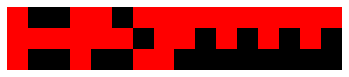

In [ ]:
## Solution via Braille Nemeth code ## 

# SOLUTION: Add 0 + 4 using Braille Nemeth code #
plus_04_sol = np.hstack((equals, numbers[4]))
print("\033[1;31;47m Solution to 0 + 4: \033[1;34;47m ' = 4 ' \033[1;31;47m in " 
      "Braille Nemeth code: \n")
matrixGrid(plus_04_sol)
gameLayout_colFlag(plus_04_sol)
plt.savefig('plus_04_sol.png', bbox_inches='tight', pad_inches = 0)

# SOLUTION: Subtract 8 - 5 using Braille Nemeth code #
minus_85_sol = np.hstack((equals, numbers[3]))
print("\n \033[1;31;47m Solution to 8 - 5: \033[1;34;47m ' = 3 ' \033[1;31;47m "
      "in Braille Nemeth code: \n")
matrixGrid(minus_85_sol)
gameLayout_colFlag(minus_85_sol)
plt.savefig('minus_85_sol.png', bbox_inches='tight', pad_inches = 0)

# Multiply 1 x 2 using Braille Nemeth code #
multiply_12_sol = np.hstack((equals, plus, numbers[2]))
print("\n \033[1;31;47m Solution to 1 x 2:\033[1;34;47m ' = + 2 ' \033[1;31;47m " 
      "in Braille Nemeth code: \n")
matrixGrid(multiply_12_sol)
gameLayout_colFlag(multiply_12_sol)
plt.savefig('multiply_12_sol.png', bbox_inches='tight', pad_inches = 0)

# Divide 2 ÷ 1 using Braille Nemeth code #
divide_21_sol = np.hstack((equals, plus, numbers[2]))
print("\n \033[1;31;47m Solution to 2 ÷ 1:\033[1;34;47m ' = + 2 ' \033[1;31;47m " 
      "in Braille Nemeth code: \n")
matrixGrid(divide_21_sol)
gameLayout_colFlag(divide_21_sol)
plt.savefig('divide_21_sol.png', bbox_inches='tight', pad_inches = 0)

# Add '100 + 100' as example why SVD is better as math level advances # 
plus_100_100_sol = np.hstack((equals, numbers[2], numbers[0], numbers[0]))
print("\n \033[1;31;47m Solution to 100 + 100: \033[1;34;47m' = 200 ' " 
      "\033[1;31;47m in Braille Nemeth code: \n")
matrixGrid(plus_100_100_sol)
gameLayout_colFlag(plus_100_100_sol)
plt.savefig('plus_100_100_sol.png', bbox_inches='tight', pad_inches = 0)

# Multiply '100 x 100' as example of 'x' and '÷' workaround for Hadamard # 
multiply_100x100_sol = np.hstack((equals, plus, numbers[1], numbers[0], 
                                  numbers[0], numbers[0], numbers[0]))
print("\n \033[1;31;47m Solution to 100 x 100: \033[1;34;47m' = + 10,000 ' " 
      "\033[1;31;47m in Braille Nemeth code: \n")
matrixGrid(multiply_100x100_sol)
gameLayout_colFlag(multiply_100x100_sol)
plt.savefig('multiply_100x100_sol.png', bbox_inches='tight', pad_inches = 0)

 Example 'x'  solution for Hadamard solving  Ax=b, where A=['0+4'] and b=['=4']


,0,1,2,3,4,5
0,1.000000,2.000000,2.000000,0.500000,1.000000,1.000000
1,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
2,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000



  Solution via Hadamard operations for ' 0 + 4 ' is  Correct : ' equals 4 '


,0,1,2,3,4,5
0,1,2,2,1,1,1
1,1,1,1,1,2,2
2,1,2,2,1,1,2



  Solution via Hadamard operations for ' 8 - 5 ' is  Correct : ' equals 3 '


,0,1,2,3,4,5
0,1,2,2,1,1,1
1,1,1,1,1,2,2
2,1,2,2,1,1,1



  Solution via Hadamard operations for ' 1 x 2 ' is  Correct : ' equals + 2 '


,0,1,2,3,4,5,6,7
0,1,2,2,1,1,2,1,1
1,1,1,1,1,1,1,2,1
2,1,2,2,1,2,2,2,1



  Solution via Hadamard operations for ' 2 ÷ 1 ' is  Correct : ' equals + 2 '


,0,1,2,3,4,5,6,7
0,1,2,2,1,1,2,1,1
1,1,1,1,1,1,1,2,1
2,1,2,2,1,2,2,2,1



  Solution via Hadamard operations for ' 100 x 100 ' is  Correct : ' equals + 10000 '


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,2,2,1,1,2,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,2,1,1,2,1,2,1,2,1,2
2,1,2,2,1,2,2,1,1,2,2,2,2,2,2,2,2


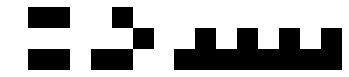

In [ ]:
## Method 1 - via Hadamard element-wise operations ##

# ADDITION: 0 + 4 solution #  
x_had_plus_04 = np.divide(plus_04_sol, plus_04_nemeth) # Hadamard division

print("\033[1;30;47m Example \033[1;34;47m'x' \033[1;30;47m solution for " 
      "Hadamard solving \033[1;34;47m Ax=b, where A=['0+4'] and b=['=4']")
matrixGridRound(x_had_plus_04)

solHadamard_plus_04 = np.multiply(x_had_plus_04, plus_04_nemeth) # Hadamard prod 
if np.all(solHadamard_plus_04 == plus_04_sol):
  check_plus_04 = "Correct"

for i in range(10):
  if np.all(numbers[i] == solHadamard_plus_04[:,[4,5]]):
    print("\n \033[1;30;47m Solution via Hadamard operations for ' 0 + 4 ' is \033[1;34;47m",
          check_plus_04,": ' equals", i,"'")
matrixGridSolType1(solHadamard_plus_04)
gameLayout_colCubehelix(solHadamard_plus_04)
plt.savefig('solHadamard_plus_04.png', bbox_inches='tight', pad_inches = 0)

# SUBTRACTION: 8 - 5 solution # 
x_had_minus_85 = np.divide(minus_85_sol, minus_85_nemeth)

solHadamard_minus_85 = np.multiply(x_had_minus_85, minus_85_nemeth)
if np.all(solHadamard_minus_85 == minus_85_sol):
  check_minus_85 = "Correct"

for i in range(10):
  if np.all(numbers[i] == solHadamard_minus_85[:,[4, 5]]):
    print("\n \033[1;30;47m Solution via Hadamard operations for ' 8 - 5 ' is \033[1;34;47m", 
          check_minus_85,": ' equals", i, "'")
matrixGridSolType1(solHadamard_minus_85)
gameLayout_colCubehelix(solHadamard_minus_85)
plt.savefig('solHadamard_minus_85.png', bbox_inches='tight', pad_inches = 0)

# MULTIPLICATION: 1 x 2 solution # 
x_had_mult_12 = np.divide(multiply_12_sol, multiply_12_nemeth)

solHadamard_mult_12 = np.multiply(x_had_mult_12, multiply_12_nemeth)
if np.all(solHadamard_mult_12 == multiply_12_sol):
  check_mult_12 = "Correct"

for i in range(10):
  if np.all(numbers[i] == solHadamard_mult_12[:,[6,7]]):
    print("\n \033[1;30;47m Solution via Hadamard operations for ' 1 x 2 ' is \033[1;34;47m", 
          check_mult_12,": ' equals +", i, "'")
matrixGridSolType1(solHadamard_mult_12)
gameLayout_colCubehelix(solHadamard_mult_12)
plt.savefig('solHadamard_mult_12.png', bbox_inches='tight', pad_inches = 0)

# DIVISION: 2 ÷ 1 solution # 
x_had_div_21 = np.divide(divide_21_sol, divide_21_nemeth)

solHadamard_div_21 = np.multiply(x_had_div_21, divide_21_nemeth)
if np.all(solHadamard_div_21 == divide_21_sol):
  check_div_21 = "Correct"

for i in range(10):
  if np.all(numbers[i] == solHadamard_div_21[:,[6,7]]):
    print("\n \033[1;30;47m Solution via Hadamard operations for ' 2 ÷ 1 ' is \033[1;34;47m", 
          check_div_21,": ' equals +", i, "'")
matrixGridSolType1(solHadamard_div_21)
gameLayout_colCubehelix(solHadamard_div_21)
plt.savefig('solHadamard_div_21.png', bbox_inches='tight', pad_inches = 0)

# MULTIPLICATION: 100 x 100 solution # 
x_had_mult_100x100 = np.divide(multiply_100x100_sol, multiply_100x100_nemeth)

solHadamard_mult_100x100 = np.multiply(x_had_mult_100x100, 
                                       multiply_100x100_nemeth)
if np.all(solHadamard_mult_100x100 == multiply_100x100_sol):
  check_mult_100x100 = "Correct"

for i in range(10):
  if np.all(np.hstack((numbers[i],numbers[0],numbers[0], numbers[0], numbers[0]
                )) == solHadamard_mult_100x100[:,[6,7,8,9,10,11,12,13,14,15]]):
    print("\n \033[1;30;47m Solution via Hadamard operations for ' 100 x 100 ' is \033[1;34;47m", 
          check_mult_100x100,": ' equals +", i*10000, "'")
matrixGridSolType1(solHadamard_mult_100x100)
gameLayout_colCubehelix(solHadamard_mult_100x100)
plt.savefig('solHadamard_mult_100x100.png', bbox_inches='tight', pad_inches = 0)

In [ ]:
## Define SVD function using linalg module ##
# u,sigma,vt = svd(A)#
def PseudoInv(A):
  u,sigma,vt = svd(A)
  r = rank(A)
  sigma[:r] = 1/sigma[:r]
  m, n = A.shape
  sigma_inv = diagsvd(sigma, m, n).T
  PseudoInv = vt.T.dot(sigma_inv).dot(u.T)
  return PseudoInv

def sol_svd(A, b):
  x_svd = PseudoInv(A).dot(b)
  return x_svd

 Example 'x'  solution for SVD solving  Ax=b, where A=['0+4'] and b=['=4']


,0,1,2,3,4,5
0,-0.036000,0.107000,0.107000,-0.036000,-0.214000,0.161000
1,0.036000,-0.107000,-0.107000,0.036000,0.214000,0.339000
2,-0.036000,0.107000,0.107000,-0.036000,-0.214000,0.161000
3,0.357000,0.929000,0.929000,0.357000,0.143000,-0.107000
4,0.286000,0.143000,0.143000,0.286000,0.714000,0.214000
5,0.036000,-0.107000,-0.107000,0.036000,0.214000,0.339000



  Solution via SVD for ' 0 + 4 ' is  Correct : ' equals  4 '


,0,1,2,3,4,5
0,1,2,2,1,1,1
1,1,1,1,1,2,2
2,1,2,2,1,1,2



   Solution via SVD for ' 8 - 5 ' is  Correct : ' equals  3 '


,0,1,2,3,4,5
0,1,2,2,1,1,1
1,1,1,1,1,2,2
2,1,2,2,1,1,1



  Solution via SVD for ' 1 x 2 ' is  Correct : ' equals + 2 '


,0,1,2,3,4,5,6,7
0,1,2,2,1,1,2,1,1
1,1,1,1,1,1,1,2,1
2,1,2,2,1,2,2,2,1



  Solution via SVD for ' 2 ÷ 1 ' is  Correct : ' equals + 2 '


,0,1,2,3,4,5,6,7
0,1,2,2,1,1,2,1,1
1,1,1,1,1,1,1,2,1
2,1,2,2,1,2,2,2,1



  Solution via SVD for ' 100 x 100 ' is  Correct : ' equals 10000 '


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,2,2,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,2,1,1,2,1,2,1,2,1,2
2,1,2,2,1,1,1,2,2,2,2,2,2,2,2



  Solution via SVD for ' 100 + 100 ' is  Correct : ' equals  200 '


,0,1,2,3,4,5,6,7,8,9
0,1,2,2,1,1,1,1,1,1,1
1,1,1,1,1,2,1,1,2,1,2
2,1,2,2,1,2,1,2,2,2,2


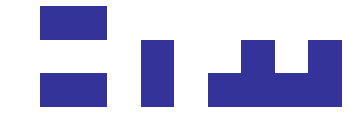

In [ ]:
## Method 2 - Solve via SVD ##

# ADDITION: 0 + 4 solution #  
x_svd_plus_04 = sol_svd(plus_04_nemeth, plus_04_sol)
print("\033[1;30;47m Example \033[1;34;47m'x' \033[1;30;47m solution for " 
      "SVD solving \033[1;34;47m Ax=b, where A=['0+4'] and b=['=4']")
matrixGridRound(x_svd_plus_04)
solSVD_plus_04 = np.matmul(plus_04_nemeth, x_svd_plus_04)

if np.all(solSVD_plus_04.round(decimals=0) == plus_04_sol):
  checkSVD_plus_04 = "Correct"

for i in range(10):
  if np.all(numbers[i] == solSVD_plus_04[:,[4,5]].round(decimals=0)):
    print("\n \033[1;30;47m Solution via SVD for ' 0 + 4 ' is \033[1;34;47m", 
          checkSVD_plus_04,": ' equals ", i, "'")

matrixGridSolType2(solSVD_plus_04)
gameLayout_colTerrain(solSVD_plus_04)
plt.savefig('solSVD_plus_04.png', bbox_inches='tight', pad_inches = 0)

# SUBTRACTION: 8 - 5 solution # 
x_svd_minus_85 = sol_svd(minus_85_nemeth, minus_85_sol)
solSVD_minus_85 = np.matmul(minus_85_nemeth, x_svd_minus_85)

if np.all(solSVD_minus_85.round(decimals=0) == minus_85_sol):
  checkSVD_minus_85 = "Correct"

for i in range(10):
  if np.all(numbers[i] == solSVD_minus_85[:,[4,5]].round(decimals=0)):
    print("\n \033[1;30;47m  Solution via SVD for ' 8 - 5 ' is \033[1;34;47m", 
          checkSVD_minus_85,": ' equals ", i, "'")

matrixGridSolType2(solSVD_minus_85)
gameLayout_colTerrain(solSVD_minus_85)
plt.savefig('solSVD_minus_85.png', bbox_inches='tight', pad_inches = 0)

# MULTIPLICATION: 1 x 2 solution # 
x_svd_mult_12 = sol_svd(multiply_12_nemeth, multiply_12_sol)
solSVD_mult_12 = np.matmul(multiply_12_nemeth, x_svd_mult_12)

if np.all(solSVD_mult_12.round(decimals=0) == multiply_12_sol):
  checkSVD_mult_12 = "Correct"

for i in range(10):
  if np.all(numbers[i] == solSVD_mult_12[:,[6,7]].round(decimals=0)):
    print("\n \033[1;30;47m Solution via SVD for ' 1 x 2 ' is \033[1;34;47m", 
          checkSVD_mult_12,": ' equals +", i, "'")

matrixGridSolType2(solSVD_mult_12)
gameLayout_colTerrain(solSVD_mult_12)
plt.savefig('solSVD_mult_12.png', bbox_inches='tight', pad_inches = 0)

# DIVISION: 2 ÷ 1 solution # 
x_svd_div_21 = sol_svd(divide_21_nemeth, divide_21_sol)
solSVD_div_21 = np.matmul(divide_21_nemeth, x_svd_div_21)

if np.all(solSVD_div_21.round(decimals=0) == divide_21_sol):
  checkSVD_div_21 = "Correct"

for i in range(10):
  if np.all(numbers[i] == solSVD_div_21[:,[6,7]].round(decimals=0)):
    print("\n \033[1;30;47m Solution via SVD for ' 2 ÷ 1 ' is \033[1;34;47m", 
          checkSVD_div_21,": ' equals +", i, "'")

matrixGridSolType2(solSVD_div_21)
gameLayout_colTerrain(solSVD_div_21)
plt.savefig('solSVD_div_21.png', bbox_inches='tight', pad_inches = 0)

# MULTIPLICATION: 100 x 100 solution # 
# Remove '+' as SVD works in all cases, no constraint on row/col length #
multiply_100x100_sol_svd = np.hstack((equals, numbers[1], numbers[0], 
                                  numbers[0], numbers[0], numbers[0]))

x_svd_mult_100 = sol_svd(multiply_100x100_nemeth, multiply_100x100_sol_svd)
solSVD_mult_100 = np.matmul(multiply_100x100_nemeth, x_svd_mult_100)

if np.all(solSVD_mult_100.round(decimals=0) == multiply_100x100_sol_svd):
  checkSVD_mult_100 = "Correct"

for i in range(10):
  if np.all(np.hstack((numbers[i],numbers[0],numbers[0], numbers[0], numbers[0]
        )) == solSVD_mult_100[:,[4,5,6,7,8,9,10,11,12,13]].round(decimals=0)):
    print("\n \033[1;30;47m Solution via SVD for ' 100 x 100 ' is \033[1;34;47m", 
          checkSVD_mult_100,": ' equals", i*10000, "'")

matrixGridSolType2(solSVD_mult_100)
gameLayout_colTerrain(solSVD_mult_100)
plt.savefig('solSVD_mult_100.png', bbox_inches='tight', pad_inches = 0)

# ADDITION: 100 + 100 solution #  
x_svd_plus_100 = sol_svd(plus_100_100_nemeth, plus_100_100_sol)
solSVD_plus_100 = np.matmul(plus_100_100_nemeth, x_svd_plus_100)

if np.all(solSVD_plus_100.round(decimals=0) == plus_100_100_sol):
  checkSVD_plus_100 = "Correct"

for i in range(10):
  if np.all(numbers[i] == solSVD_plus_100[:,[4,5]].round(decimals=0)):
    print("\n \033[1;30;47m Solution via SVD for ' 100 + 100 ' is \033[1;34;47m", 
          checkSVD_plus_100,": ' equals ", i*100, "'")

matrixGridSolType2(solSVD_plus_100)
gameLayout_colTerrain(solSVD_plus_100)
plt.savefig('solSVD_plus_100.png', bbox_inches='tight', pad_inches = 0)

**Data compression and storage savings with low-rank SVD and randomised SVD**
*   Corresponds to ***Section 3.1*** in dissertation

In [ ]:
## Example of A=['0+4'] matrix ##
# Find shape #
plus_04_nemeth.shape

(3, 6)

In [ ]:
## Full SVD for A=['0+4'] as example, easily replicable ##
u, sigma, vt = svd(plus_04_nemeth)
print("\033[1;33;40m Full SVD decomposition")
print("\033[1;34;47m Total size in element counts: ", 
      (u.size + sigma.size + vt.size))
print("\033[1;34;47m Total bytes count: ", 
      (sys.getsizeof(u) + sys.getsizeof(sigma) + sys.getsizeof(vt)))
print("\n \033[1;30;47m u: \033[1;35;47m {size in element counts:", u.size, 
      "| size in bytes: ", sys.getsizeof(u),"}")
matrixGridRoundCol(u)
print("\n\033[1;30;47m sigma: \033[1;35;47m(non-zero) {size in element counts:",
      sigma.size, "| size in bytes:", sys.getsizeof(sigma),"}")
matrixGridRoundCol(S)
print("\n \033[1;30;47m vt: \033[1;35;47m {size in element counts:", vt.size, 
      "| size in bytes:", sys.getsizeof(vt),"}")
matrixGridRoundCol(vt)

## Low-rank SVD / truncated SVD ##
r = rank(plus_04_nemeth)
m, n = plus_04_nemeth.shape
u_lowR = u[:,0:r]
S = diagsvd(sigma, m, n)
s_lowR = S[0:r,0:r]
vt_lowR = vt[0:r, :]
print("\n\033[1;33;40m Low-rank SVD decomposition")
print("\033[1;34;47m Total size in element counts: ", 
      (u_lowR.size + sigma.size + vt_lowR.size))
print("\033[1;34;47m Total bytes count: ", 
      (sys.getsizeof(u_lowR) + sys.getsizeof(sigma) + sys.getsizeof(vt_lowR)))
print("\n \033[1;30;47m u_lowR: \033[1;35;47m {size in element counts:", 
      u_lowR.size, "| size in bytes:", sys.getsizeof(u_lowR),"}")
matrixGridRoundCol(u_lowR)
print("\n\033[1;30;47m sigma: \033[1;35;47m(non-zero) {size in element counts:", 
      sigma.size, "| size in bytes:", sys.getsizeof(sigma),"}")
matrixGridRoundCol(s_lowR)
print("\n \033[1;30;47m vt_lowR: \033[1;35;47m {size in element counts:", 
      vt_lowR.size, "| size in bytes:", sys.getsizeof(vt_lowR),"}")
matrixGridRoundCol(vt_lowR)

## Ramdonised SVD by HMT ##
from sklearn.utils.extmath import randomized_svd
r = rank(plus_04_nemeth)
u_rand, s_rand, vt_rand = randomized_svd(plus_04_nemeth, r, random_state=None)
S_rand = diagsvd(s_rand, r, r)
print("\n\033[1;33;40m Ramdonised SVD decomposition")
print("\033[1;34;47m Total size in element counts: ", 
      (u_rand.size + s_rand.size + vt_rand.size))
print("\033[1;34;47m Total bytes count: ", 
      (sys.getsizeof(u_rand) + sys.getsizeof(s_rand) + sys.getsizeof(vt_rand)))
print("\n \033[1;30;47m u_rand: \033[1;35;47m {size in element counts:", 
      u_rand.size, "| size in bytes:", sys.getsizeof(u_rand),"}")
matrixGridRoundCol(u_rand)
print("\n\033[1;30;47m s_rand: \033[1;35;47m(non-zero) {size in element counts:", 
  s_rand.size, "| size in bytes:", sys.getsizeof(s_rand),"}")
matrixGridRoundCol(S_rand)
print("\n \033[1;30;47m vt_rand: \033[1;35;47m {size in element counts:", 
      vt_rand.size, "| size in bytes:", sys.getsizeof(vt_rand),"}")
matrixGridRoundCol(vt_rand)

 Full SVD decomposition
 Total size in element counts:  48
 Total bytes count:  728

  u:  {size in element counts: 9 | size in bytes:  192 }


,0,1,2
0,-0.441000,0.408000,-0.799000
1,-0.568000,-0.816000,-0.103000
2,-0.695000,0.408000,0.592000



 sigma: (non-zero) {size in element counts: 3 | size in bytes: 128 }


,0,1,2,3,4,5
0,6.507000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.414000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.813000,0.000000,0.000000,0.000000



  vt:  {size in element counts: 36 | size in bytes: 408 }


,0,1,2,3,4,5
0,-0.369000,-0.456000,-0.369000,-0.436000,-0.349000,-0.456000
1,0.289000,-0.289000,0.289000,0.577000,-0.577000,-0.289000
2,0.346000,0.219000,0.346000,-0.636000,-0.509000,0.219000
3,-0.773000,0.431000,0.326000,0.149000,-0.298000,0.016000
4,-0.137000,-0.453000,0.742000,-0.202000,0.403000,-0.152000
5,-0.212000,-0.520000,-0.067000,0.093000,-0.186000,0.798000



 Low-rank SVD decomposition
 Total size in element counts:  30
 Total bytes count:  368

  u_lowR:  {size in element counts: 9 | size in bytes: 120 }


,0,1,2
0,-0.441000,0.408000,-0.799000
1,-0.568000,-0.816000,-0.103000
2,-0.695000,0.408000,0.592000



 sigma: (non-zero) {size in element counts: 3 | size in bytes: 128 }


,0,1,2
0,6.507000,0.000000,0.000000
1,0.000000,1.414000,0.000000
2,0.000000,0.000000,0.813000



  vt_lowR:  {size in element counts: 18 | size in bytes: 120 }


,0,1,2,3,4,5
0,-0.369000,-0.456000,-0.369000,-0.436000,-0.349000,-0.456000
1,0.289000,-0.289000,0.289000,0.577000,-0.577000,-0.289000
2,0.346000,0.219000,0.346000,-0.636000,-0.509000,0.219000



 Ramdonised SVD decomposition
 Total size in element counts:  30
 Total bytes count:  344

  u_rand:  {size in element counts: 9 | size in bytes: 120 }


,0,1,2
0,0.441000,-0.408000,0.799000
1,0.568000,0.816000,0.103000
2,0.695000,-0.408000,-0.592000



 s_rand: (non-zero) {size in element counts: 3 | size in bytes: 104 }


,0,1,2
0,6.507000,0.000000,0.000000
1,0.000000,1.414000,0.000000
2,0.000000,0.000000,0.813000



  vt_rand:  {size in element counts: 18 | size in bytes: 120 }


,0,1,2,3,4,5
0,0.369000,0.456000,0.369000,0.436000,0.349000,0.456000
1,-0.289000,0.289000,-0.289000,-0.577000,0.577000,0.289000
2,-0.346000,-0.219000,-0.346000,0.636000,0.509000,-0.219000


In [ ]:
## Why randomised SVD compresses sigma matrix as well (though negligibly) ##
from decimal import *
print("\033[1;37;40m Randomised SVD (negligibly) compresses sigular values via "
"approximation \n")
print("\033[1;34;47m")
print("s_rand[0]: ", Decimal(s_rand[0]))
print("sigma[0]:  ", Decimal(sigma[0]))
diff = Decimal(s_rand[0] - sigma[0])
print("difference:", f'{diff:.20f}')

 Randomised SVD (negligibly) compresses sigular values via approximation 


s_rand[0]:  6.5068168857110730840531687135808169841766357421875
sigma[0]:   6.50681688571107041951790961320511996746063232421875
difference: 0.00000000000000266454


In [ ]:
## Check all methods give you same A=['0+4'] ##
print("\033[1;37;40m Check all methods give you same A=['0+4'] \n")
A_svd = u.dot(S).dot(vt)
print("\033[1;30;47m A_svd:")
matrixGrid(A_svd)
A_svd_lowR = u_lowR.dot(s_lowR).dot(vt_lowR)
print("\n \033[1;30;47m A_svd_lowRank:")
matrixGridSolType1(A_svd_lowR)
A_svd_RandomisedLowR = u_rand.dot(S_rand).dot(vt_rand)
print("\n \033[1;30;47m A_svd_RandomisedLowRank:")
matrixGridSolType2(A_svd_RandomisedLowR)

 Check all methods give you same A=['0+4'] 

 A_svd:


,0,1,2,3,4,5
0,1,1,1,2,1,1
1,1,2,1,1,2,2
2,2,2,2,2,1,2



  A_svd_lowRank:


,0,1,2,3,4,5
0,1,1,1,2,1,1
1,1,2,1,1,2,2
2,2,2,2,2,1,2



  A_svd_RandomisedLowRank:


,0,1,2,3,4,5
0,1,1,1,2,1,1
1,1,2,1,1,2,2
2,2,2,2,2,1,2


In [ ]:
## Example when this becomes more beneficial - long equation ##
((((((100*50)+(100*(50-5)+(1000/2)))*1000000)/1000000)*1000000)/1000000)

10000.0000

In [ ]:
## CONT. Example when this becomes more beneficial - long equation ##
""" Teaching kid rules of arithmetic & order of operations 
((((((100*50)+(100*(50-5)+(1000÷2)))*1000000)÷1000000)*1000000)÷1000000)=10,000
"""
open_bracket = np.array([cell_21, cell_22, cell_22])
close_bracket = np.array([cell_12, cell_22, cell_22])
long_A = np.hstack((open_bracket, open_bracket, open_bracket, open_bracket, 
open_bracket, open_bracket, numbers[1], numbers[0], numbers[0], multiply,
numbers[5], numbers[0], close_bracket, plus, open_bracket, numbers[1], 
numbers[0], numbers[0], multiply, open_bracket, numbers[5], numbers[0], minus,
numbers[5], close_bracket, plus, open_bracket, numbers[1], numbers[0], 
numbers[0], numbers[0], divide, numbers[2], close_bracket, close_bracket, 
close_bracket, multiply, numbers[1], numbers[0], numbers[0], numbers[0], 
numbers[0], numbers[0], numbers[0], close_bracket, divide, numbers[1], 
numbers[0], numbers[0], numbers[0], numbers[0], numbers[0], numbers[0], 
close_bracket, multiply, numbers[1], numbers[0], numbers[0], numbers[0], 
numbers[0], numbers[0], numbers[0], close_bracket, divide, numbers[1], 
numbers[0], numbers[0], numbers[0], numbers[0], numbers[0], numbers[0], 
close_bracket))
print("\033[1;34;47m Order of Ops " 
"'((((((100*50)+(100*(50-5)+(1000÷2)))*1000000)÷1000000)*1000000)÷1000000)'"
"\033[1;32;47m \n In Braille Nemeth code: \n")
print("\033[1;36;47m matrix size |", long_A.shape)
#matrixGrid(long_A)

 Order of Ops '((((((100*50)+(100*(50-5)+(1000÷2)))*1000000)÷1000000)*1000000)÷1000000)' 
 In Braille Nemeth code: 

 matrix size | (3, 158)


In [ ]:
## Full SVD ##
print("\033[1;37;40m Example equation:"
"((((((100*50)+(100*(50-5)+(1000÷2)))*1000000)÷1000000)*1000000)÷1000000)")
u, sigma, vt = svd(long_A)
print("\033[1;33;40m Full SVD decomposition")
print("\033[1;34;47m Total size in element counts: ", 
      (u.size + sigma.size + vt.size))
print("\033[1;34;47m Total bytes count: ", 
      (sys.getsizeof(u) + sys.getsizeof(sigma) + sys.getsizeof(vt)))
print("\n \033[1;30;47m u: \033[1;35;47m {size in element counts:", u.size, 
      "| size in bytes: ", sys.getsizeof(u),"}")
print("\033[1;36;47m matrix size |", u.shape)
r = rank(long_A)
m, n = long_A.shape
S = diagsvd(sigma, m, n)
print("\n\033[1;30;47m sigma: \033[1;35;47m(non-zero) {size in element counts:",
      sigma.size, "| size in bytes:", sys.getsizeof(sigma),"}")
print("\033[1;36;47m matrix size |", S.shape)
print("\n \033[1;30;47m vt: \033[1;35;47m {size in element counts:", vt.size, 
      "| size in bytes:", sys.getsizeof(vt),"}")
print("\033[1;36;47m matrix size |", vt.shape)

## Low-rank SVD / truncated SVD ##
r = rank(long_A)
m, n = long_A.shape
u_lowR = u[:,0:r]
s_lowR = S[0:r,0:r]
vt_lowR = vt[0:r, :]
print("\n\033[1;33;40m Low-rank SVD decomposition")
print("\033[1;34;47m Total size in element counts: ", 
      (u_lowR.size + sigma.size + vt_lowR.size))
print("\033[1;34;47m Total bytes count: ", 
      (sys.getsizeof(u_lowR) + sys.getsizeof(sigma) + sys.getsizeof(vt_lowR)))
print("\n \033[1;30;47m u_lowR: \033[1;35;47m {size in element counts:", 
      u_lowR.size, "| size in bytes:", sys.getsizeof(u_lowR),"}")
print("\033[1;36;47m matrix size |", u_lowR.shape)
print("\n\033[1;30;47m sigma: \033[1;35;47m(non-zero) {size in element counts:", 
      sigma.size, "| size in bytes:", sys.getsizeof(sigma),"}")
print("\033[1;36;47m matrix size |", s_lowR.shape)
print("\n \033[1;30;47m vt_lowR: \033[1;35;47m {size in element counts:", 
      vt_lowR.size, "| size in bytes:", sys.getsizeof(vt_lowR),"}")
print("\033[1;36;47m matrix size |", vt_lowR.shape)

## Ramdonised SVD by HMT ##
from sklearn.utils.extmath import randomized_svd
u_rand, s_rand, vt_rand = randomized_svd(long_A, r, random_state=None)
r = rank(long_A)
S_rand = diagsvd(s_rand, r, r)
print("\n\033[1;33;40m Ramdonised SVD decomposition")
print("\033[1;34;47m Total size in element counts: ", 
      (u_rand.size + s_rand.size + vt_rand.size))
print("\033[1;34;47m Total bytes count: ", 
      (sys.getsizeof(u_rand) + sys.getsizeof(s_rand) + sys.getsizeof(vt_rand)))
print("\n \033[1;30;47m u_rand: \033[1;35;47m {size in element counts:", 
      u_rand.size, "| size in bytes:", sys.getsizeof(u_rand),"}")
print("\033[1;36;47m matrix size |", u_rand.shape)
print("\n\033[1;30;47m s_rand: \033[1;35;47m(non-zero) {size in element counts:", 
  s_rand.size, "| size in bytes:", sys.getsizeof(s_rand),"}")
print("\033[1;36;47m matrix size |", S_rand.shape)
print("\n \033[1;30;47m vt_rand: \033[1;35;47m {size in element counts:", 
      vt_rand.size, "| size in bytes:", sys.getsizeof(vt_rand),"}")
print("\033[1;36;47m matrix size |", vt_rand.shape)

 Example equation:((((((100*50)+(100*(50-5)+(1000÷2)))*1000000)÷1000000)*1000000)÷1000000)
 Full SVD decomposition
 Total size in element counts:  24976
 Total bytes count:  200152

  u:  {size in element counts: 9 | size in bytes:  192 }
 matrix size | (3, 3)

 sigma: (non-zero) {size in element counts: 3 | size in bytes: 128 }
 matrix size | (3, 158)

  vt:  {size in element counts: 24964 | size in bytes: 199832 }
 matrix size | (158, 158)

 Low-rank SVD decomposition
 Total size in element counts:  486
 Total bytes count:  368

  u_lowR:  {size in element counts: 9 | size in bytes: 120 }
 matrix size | (3, 3)

 sigma: (non-zero) {size in element counts: 3 | size in bytes: 128 }
 matrix size | (3, 3)

  vt_lowR:  {size in element counts: 474 | size in bytes: 120 }
 matrix size | (3, 158)

 Ramdonised SVD decomposition
 Total size in element counts:  486
 Total bytes count:  344

  u_rand:  {size in element counts: 9 | size in bytes: 120 }
 matrix size | (3, 3)

 s_rand: (non-zero) {s

In [ ]:
## Why we can use Hadamard for MULTIPLY and DIVIDE - number theory proof ## 

gamma = 1

# Check for first 50k numbers # 

for m in range(1, 500*100, 1):
  for n in range(1, 500*100, 1):
    d_T = len(str(m)) + len(str(n))
    if d_T > len(str(m*n)):
      if d_T > (len(str(m*n)) + len(str(gamma))):
        print("False - not always true! e.g.", m, n)
    elif d_T < len(str(m*n)):
      if d_T < (len(str(m*n)) + len(str(gamma))):
        print("False - not always true! e.g.", m, n)
print("\033[1;37;40m True - equality up to gamma = 1 for",
                                                " first 50k integers (excl. 0)")

 True - equality up to gamma = 1 for first 50k integers (excl. 0)


**Numerical Braille Code** 

*   Corresponds to ***Section 2*** in dissertation

**Generating Braille alphabet as matrices**

In [ ]:
## Method 1 - Creating each Braille letter as a matrix one by one ##

t1 = time.process_time()

a = np.array([[1, 0], [0, 0], [0, 0]])
b = np.array([[1, 0], [1, 0], [0, 0]])
c = np.array([[1, 1], [0, 0], [0, 0]])
d = np.array([[1, 1], [0, 1], [0, 0]])
e = np.array([[1, 0], [0, 1], [0, 0]])
f = np.array([[1, 1], [1, 0], [0, 0]])
g = np.array([[1, 1], [1, 1], [0, 0]])
h = np.array([[1, 0], [1, 1], [0, 0]])
i = np.array([[0, 1], [1, 0], [0, 0]])
j = np.array([[0, 1], [1, 1], [0, 0]])
k = np.array([[1, 0], [0, 0], [1, 0]])
l = np.array([[1, 0], [1, 0], [1, 0]])
m = np.array([[1, 1], [0, 0], [1, 0]])
n = np.array([[1, 1], [0, 1], [1, 0]])
o = np.array([[1, 0], [0, 1], [1, 0]])
p = np.array([[1, 1], [1, 0], [1, 0]])
q = np.array([[1, 1], [1, 1], [1, 0]])
r = np.array([[1, 0], [1, 1], [1, 0]])
s = np.array([[0, 1], [1, 0], [1, 0]])
t = np.array([[0, 1], [1, 1], [1, 0]])
u = np.array([[1, 0], [0, 0], [1, 1]])
v = np.array([[1, 0], [1, 0], [1, 1]])
w = np.array([[0, 1], [1, 1], [0, 1]])
x = np.array([[1, 1], [0, 0], [1, 1]])
y = np.array([[1, 1], [0, 1], [1, 1]])
z = np.array([[1, 0], [0, 1], [1, 1]])

t2 = time.process_time()
print('time taken to run:',t2-t1)

time taken to run: 0.0006473200000001178


In [ ]:
## Method 2 - Using 2x1 arrays and their combinations ##
""" opt method
"""

t1 = time.process_time()

cell_00 = np.array([0, 0])
cell_10 = np.array([1, 0])
cell_01 = np.array([0, 1])
cell_11 = np.array([1, 1])

a_opt = np.array([cell_10, cell_00, cell_00])
b_opt = np.array([cell_10, cell_10, cell_00])
c_opt = np.array([cell_11, cell_00, cell_00])
d_opt = np.array([cell_11, cell_01, cell_00])
e_opt = np.array([cell_10, cell_01, cell_00])
f_opt = np.array([cell_11, cell_10, cell_00])
g_opt = np.array([cell_11, cell_11, cell_00])
h_opt = np.array([cell_10, cell_11, cell_00])
i_opt = np.array([cell_01, cell_10, cell_00])
j_opt = np.array([cell_01, cell_11, cell_00])
k_opt = np.array([cell_10, cell_00, cell_10])
l_opt = np.array([cell_10, cell_10, cell_10])
m_opt = np.array([cell_11, cell_00, cell_10])
n_opt = np.array([cell_11, cell_01, cell_10])
o_opt = np.array([cell_10, cell_01, cell_10])
p_opt = np.array([cell_11, cell_10, cell_10])
q_opt = np.array([cell_11, cell_11, cell_10])
r_opt = np.array([cell_10, cell_11, cell_10])
s_opt = np.array([cell_01, cell_10, cell_10])
t_opt = np.array([cell_01, cell_11, cell_10])
u_opt = np.array([cell_10, cell_00, cell_11])
v_opt = np.array([cell_10, cell_10, cell_11])
w_opt = np.array([cell_01, cell_11, cell_01])
x_opt = np.array([cell_11, cell_00, cell_11])
y_opt = np.array([cell_11, cell_01, cell_11])
z_opt = np.array([cell_10, cell_01, cell_11])

t2 = time.process_time()
print('time taken to run:',t2-t1)

time taken to run: 0.0006609599999998217


In [ ]:
## Method 3 - Using 2x1 matrices and concatenation ##

""" optLA method
"""

t1 = time.process_time()

cell_00 = np.matrix([0, 0])
cell_10 = np.matrix([1, 0])
cell_01 = np.matrix([0, 1])
cell_11 = np.matrix([1, 1])

a_optLA = np.concatenate([cell_10, cell_00, cell_00], axis=0)
b_optLA = np.concatenate([cell_10, cell_10, cell_00], axis=0)
c_optLA = np.concatenate([cell_11, cell_00, cell_00], axis=0)
d_optLA = np.concatenate([cell_11, cell_01, cell_00], axis=0)
e_optLA = np.concatenate([cell_10, cell_01, cell_00], axis=0)
f_optLA = np.concatenate([cell_11, cell_10, cell_00], axis=0)
g_optLA = np.concatenate([cell_11, cell_11, cell_00], axis=0)
h_optLA = np.concatenate([cell_10, cell_11, cell_00], axis=0)
i_optLA = np.concatenate([cell_01, cell_10, cell_00], axis=0)
j_optLA = np.concatenate([cell_01, cell_11, cell_00], axis=0)
k_optLA = np.concatenate([cell_10, cell_00, cell_10], axis=0)
l_optLA = np.concatenate([cell_10, cell_10, cell_10], axis=0)
m_optLA = np.concatenate([cell_11, cell_00, cell_10], axis=0)
n_optLA = np.concatenate([cell_11, cell_01, cell_10], axis=0)
o_optLA = np.concatenate([cell_10, cell_01, cell_10], axis=0)
p_optLA = np.concatenate([cell_11, cell_10, cell_10], axis=0)
q_optLA = np.concatenate([cell_11, cell_11, cell_10], axis=0)
r_optLA = np.concatenate([cell_10, cell_11, cell_10], axis=0)
s_optLA = np.concatenate([cell_01, cell_10, cell_10], axis=0)
t_optLA = np.concatenate([cell_01, cell_11, cell_10], axis=0)
u_optLA = np.concatenate([cell_10, cell_00, cell_11], axis=0)
v_optLA = np.concatenate([cell_10, cell_10, cell_11], axis=0)
w_optLA = np.concatenate([cell_01, cell_11, cell_01], axis=0)
x_optLA = np.concatenate([cell_11, cell_00, cell_11], axis=0)
y_optLA = np.concatenate([cell_11, cell_01, cell_11], axis=0)
z_optLA = np.concatenate([cell_10, cell_01, cell_11], axis=0)

t2 = time.process_time()
print('time taken to run:',t2-t1)

time taken to run: 0.0008559909999998894


In [ ]:
## Create lists of the Braille Alphabet as matrices ##

# Method 1 #
alpha = [a, b, c, d, e, f, g, h, i, j, k, l, m, 
         n, o, p, q, r, s, t, u, v, w, x, y, z]

# Method 2 #
alpha_opt = [a_opt, b_opt, c_opt, d_opt, e_opt, f_opt, g_opt, h_opt, i_opt, 
             j_opt, k_opt, l_opt, m_opt, n_opt, o_opt, p_opt, q_opt, r_opt, 
             s_opt, t_opt, u_opt, v_opt, w_opt, x_opt, y_opt, z_opt]

# Method 3 # 
alpha_optLA = [a_optLA, b_optLA, c_optLA, d_optLA, e_optLA, f_optLA, g_optLA, 
               h_optLA, i_optLA, j_optLA, k_optLA, l_optLA, m_optLA, n_optLA, 
               o_optLA, p_optLA, q_optLA, r_optLA, s_optLA, t_optLA, u_optLA, 
               v_optLA, w_optLA, x_optLA, y_optLA, z_optLA]

In [ ]:
## Creating list with alphabet letter indexing for identification later ##
alpha_index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
               'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

**Generating capital letter Braille alphabet as matrices**

In [ ]:
## Create the Capital Letters Alphabet list ## 
t1 = time.process_time()

capital_sign = np.array([[0, 0], [0, 0], [0, 1]])

# Append all lists with capital_sign matrix #

alpha_capital = [0]*len(alpha)
alpha_opt_capital = [0]*len(alpha_opt)
alpha_optLA_capital = [0]*len(alpha_optLA)
c = 0
while(c<len(alpha)):
    alpha_capital[c] = np.append(capital_sign, alpha[c], axis = 1)
    alpha_opt_capital[c] = np.append(capital_sign, alpha_opt[c], axis = 1)
    alpha_optLA_capital[c] = np.append(capital_sign, alpha_optLA[c], axis = 1)
    c = c + 1

t2 = time.process_time()
print('time taken to run:',t2-t1)

print(" \033[1;32;47m Matrix representation of Braille 'capital letter' sign:")
matrixGrid(capital_sign)

print("\n \033[1;33;40m Key: \033[0;32;47m Green shaded numbers - "
"\033[0;30;47m raised Braille dot | \033[0;31;47m Red shaded numbers - "
"\033[0;30;47m not raised \n")

print("\033[1;37;40m Capital letter 'A': \n")
matrixGrid(alpha_capital[0])
print("\n \033[1;37;40m Lowercase letter 'a': \n")
matrixGrid(alpha[0])

time taken to run: 0.0022589579999987563
  Matrix representation of Braille 'capital letter' sign:


,0,1
0,0,0
1,0,0
2,0,1



  Key:  Green shaded numbers -  raised Braille dot |  Red shaded numbers -  not raised 

 Capital letter 'A': 



,0,1,2,3
0,0,0,1,0
1,0,0,0,0
2,0,1,0,0



  Lowercase letter 'a': 



,0,1
0,1,0
1,0,0
2,0,0


In [ ]:
## Checking if Method 1 and Method 2 produce same matrices using LA ##
## Then Method 2 and 3 (Commutative) ##
t1 = 0 # tracker 1
t2 = 0 # tracker 2
for i in range(0,26,1):
    check_opt = np.all(alpha_capital[i] == alpha_opt_capital[i])
    check_optLA = np.all(alpha_opt_capital[i] == alpha_optLA_capital[i])
    if check_opt == False:
      t1 = t1 + 1
    if check_optLA == False:
      t2 = t2 + 1

if t1 != 0:
  print(check_opt, "-at least one capital letter in Method 1/2 does not match")
elif t2 !=0:
  print(check_optLA,"-at least one capital letter in Method 2/3 does not match")
else:
  print("\033[1;34;47m True - all capital letters match across Methods 1, 2 & 3"
" when using 'append' algorithm")

 True - all capital letters match across Methods 1, 2 & 3 when using 'append' algorithm


In [ ]:
## Create the Capital Letters Alphabet using horizontal stack ## 
t1 = time.process_time()

capital_sign = np.array([[0, 0], [0, 0], [0, 1]])

# Append all lists with dummy array to allow to be square matrix ##

alpha_capital = [0]*len(alpha)
alpha_opt_capital = [0]*len(alpha_opt)
alpha_optLA_capital = [0]*len(alpha_optLA)

c = 0
while(c<len(alpha)):
    alpha_capital[c] = np.hstack([capital_sign, alpha[c]])
    alpha_opt_capital[c] = np.hstack([capital_sign, alpha_opt[c]])
    alpha_optLA_capital[c] = np.hstack([capital_sign, alpha_optLA[c]])
    c = c + 1

t2 = time.process_time()
print('time taken to run:',t2-t1)

time taken to run: 0.002723929000012504


In [ ]:
## Checking if Method 1 and Method 2 produce same matrices using LA ##
## Then Method 2 and 3 (Commutative) ##
t1 = 0 # tracker 1
t2 = 0 # tracker 2
for i in range(0,26,1):
    check_opt = np.all(alpha_capital[i] == alpha_opt_capital[i])
    check_optLA = np.all(alpha_opt_capital[i] == alpha_optLA_capital[i])
    if check_opt == False:
      t1 = t1 + 1
    if check_optLA == False:
      t2 = t2 + 1

if t1 != 0:
  print(check_opt, "-at least one capital letter in Method 1/2 does not match")
elif t2 !=0:
  print(check_optLA,"-at least one capital letter in Method 2/3 does not match")
else:
  print("\033[1;34;47m True - all capital letters match across Methods 1, 2 & 3"
" when using 'horizontal stack' algorithm")

 True - all capital letters match across Methods 1, 2 & 3 when using 'horizontal stack' algorithm


In [ ]:
## Creating list with capital letter indexing for identification later ##
alpha_capital_index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
    'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [ ]:
## Showing examples for word 'Oxford' and 'Mathematics' ##
print("\033[1;33;40m Key: \033[0;32;47m Green shaded numbers - "
"\033[0;30;47m raised Braille dot | \033[0;31;47m Red shaded numbers - "
"\033[0;30;47m not raised \n")

print("\033[1;36;47m Example 1: matrix for word \033[1;34;47m 'Oxford' \n")
matrixGrid(np.hstack((alpha_capital[14], x, f, o, r, d)))

print("\n \033[1;36;47m Example 2: matrix for word \033[1;34;47m'Mathematics'\n")
matrixGrid(np.hstack((alpha_capital[12], a, t, h, e, m, a, t, i, c, s)))

 Key:  Green shaded numbers -  raised Braille dot |  Red shaded numbers -  not raised 

 Example 1: matrix for word  'Oxford' 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,1,0,1,1,1,1,1,0,1,0,1,1
1,0,0,0,1,0,0,1,0,0,1,1,1,0,1
2,0,1,1,0,1,1,0,0,1,0,1,0,0,0



  Example 2: matrix for word  'Mathematics' 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,0,1,1,1,0,0,1,1,0,1,0,1,1,1,0,0,1,0,1,1,1,0,1
1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


**Authentication algorithms to check equality of Braille alphabet generated under Methods 1, 2 & 3**

*   Corresponds to ***Section 2.3*** in dissertation
  *   **2.3.1 Authentication algorithm 1:** element-wise comparison of two matrices





In [ ]:
## Checking if Method 1 and Method 2 produce same matrices using LA ##
## Then Method 2 and 3 (commutative property) ##
t1 = 0 # tracker 1
t2 = 0 # tracker 2
for i in range(0,26,1):
    check_opt = np.all(alpha[i] == alpha_opt[i])
    check_optLA = np.all(alpha_opt[i] == alpha_optLA[i])
    if check_opt == False:
      t1 = t1 + 1
    if check_optLA == False:
      t2 = t2 + 1

print("\033[1;37;40m Authentication algorithm 1:")
if t1 != 0:
  print(check_opt, " - at least one letter in Method 1/2 does not match")
elif t2 !=0:
  print(check_optLA, "- at least one letter in Method 2/3 does not match")
else:
  print("\033[1;34;47m True - all distinct letters match across Methods 1,2&3")

# Bug testing if algorithm detects as expected #
bug_test = np.all(alpha[0] == alpha_opt[1])
if bug_test == False:
  print("\n\033[1;32;47m Bug test: PASS | elements not equal,","'",bug_test,"'", 
        "as expected for different letters!")
else:
  print("\n\033[1;31;47m Bug test: FAIL | ", bug_test, "please check!")

 Authentication algorithm 1:
 True - all distinct letters match across Methods 1, 2 & 3

 Bug test: PASS | elements not equal, ' False ' as expected for different letters!


*   Corresponds to ***Section 2.3*** in dissertation
  *  **2.3.1 Authentication algorithm 2:** Inner product of difference between two matrices

In [ ]:
## Frobenius inner product | <u,u> >= 0 then no, but = 0 iff u=0 ##
t = 0 # tracker
diff = [0] * len(alpha)
dot_diff = [0] * len(alpha)
for i in range(0,26,1):
  diff[i] = np.subtract(alpha[i], alpha_opt[i])
  dot_diff[i] = np.vdot(diff[i], diff[i])
  if dot_diff[i] != 0:
    t = t + 1

print("\033[1;37;40m Authentication algorithm 2:")
if t != 0:
  print("False - at least one letter does not match")
else:
  print("\033[1;34;47m True - all distinct letters match across Methods 1,2&3")

# Bug testing if algorithm detects as expected #
bug_test = np.subtract(alpha[0], alpha_opt[1])
dot_diff_bug_test = np.vdot(bug_test, bug_test)
if dot_diff_bug_test == 0:
  print("\n\033[1;31;47m Bug test: FAIL | ", dot_diff_bug_test, "please check!")
else:
  print("\n\033[1;32;47m Bug test: PASS | inner product ≠ 0 (it is = ", 
        dot_diff_bug_test,"), as expected for different letters!")

 Authentication algorithm 2:
 True - all distinct letters match across Methods 1, 2 & 3

 Bug test: PASS | inner product ≠ 0 (it is =  1 ), as expected for different letters!


*   Corresponds to ***Section 2.3*** in dissertation
  *   **2.3.3 Authentication algorithm 3:** 
      1. Convert into square matrix via concatenation with dummy array of zeros
      2. Check equality of eigenvalues if matrices are similar

In [ ]:
## Dummy zeros array to append to each those in alpha ## 
t1 = time.process_time()

dummy_array = np.zeros((3, 1), dtype=int)

# Append all lists with dummy array to allow to be square matrix ##

c = 0
while(c<len(alpha)):
    alpha[c] = np.append(alpha[c], dummy_array, axis = 1)
    alpha_opt[c] = np.append(alpha_opt[c], dummy_array, axis = 1)
    alpha_optLA[c] = np.append(alpha_optLA[c], dummy_array, axis = 1)
    c = c + 1

t2 = time.process_time()
print('time taken to run:',t2-t1)

time taken to run: 0.0025211079999998276


In [ ]:
# # Checking if Method 1 and Method 2 produce same matrices ##
## Loop check for Method 1, 2 and 3 ##
from numpy import linalg as LA

c = 0
w_alpha = [0] * len(alpha)
v_alpha = [0] * len(alpha)
w_alpha_opt = [0] * len(alpha)
v_alpha_opt = [0] * len(alpha)
w_alpha_optLA = [0] * len(alpha)
v_alpha_optLA = [0] * len(alpha)

while(c<len(alpha)):
  w_alpha[c], v_alpha[c] = LA.eig(alpha[c])
  w_alpha_opt[c], v_alpha_opt[c] = LA.eig(alpha_opt[c])
  w_alpha_optLA[c], v_alpha_optLA[c] = LA.eig(alpha_optLA[c])
  c = c + 1

In [ ]:
## Checking All Methods Commutative Rule ##
t = 0 # tracker
for i in range(0,26,1):
    check_w_opt = np.all(w_alpha[i] == w_alpha_opt[i])
    if check_w_opt == False:
      t = t + 1
    check_v_opt = np.all(v_alpha[i] == v_alpha_opt[i])
    if check_v_opt == False:
      t = t + 1
    check_w_optLA = np.all(w_alpha_opt[i] == w_alpha_optLA[i])
    if check_w_optLA == False:
      t = t + 1
    check_v_optLA = np.all(v_alpha_opt[i] == v_alpha_optLA[i])
    if check_v_optLA == False:
      t = t + 1

print("\033[1;37;40m Authentication algorithm 3:")
if t != 0:
  print("False - at least one letter does not match")
else:
  print("\033[1;34;47m True - equality of both eigenvalues and eigenvectors |"
  " all distinct letters match across Methods 1, 2 & 3")

# Bug testing if algorithm detects as expected #
bug_test_w = np.all(w_alpha[0] == w_alpha_opt[1])
bug_test_v = np.all(v_alpha[0] == v_alpha_opt[1])
if bug_test_w == True:
  if bug_test_v == True:
    print("\n\033[1;31;47m Bug test: FAIL | please check!")
else:
  print("\n\033[1;32;47m Bug test: PASS | different eigenvalues or eigenvectors,",
        "as expected for different letters!")

 Authentication algorithm 3:
 True - equality of both eigenvalues and eigenvectors | all distinct letters match across Methods 1, 2 & 3

 Bug test: PASS | different eigenvalues or eigenvectors, as expected for different letters!


In [ ]:
## Is checking equality of eigenvals and eigenvecs generalizable? ## 
## Only works a priori if all Braille alphabet matrices are diagonalisable ##
""" Diagonalisation Theorem: a 'm x m' matrix is diagonalisable, 
    iff it has 'm' linearly independent eigenvectors
"""
from sympy.matrices import Matrix 

# Check if all Braille matrices are diagonalisable #
non_diag_index = [-1] * len(alpha)
for i in range(0,26,1):
    if Matrix(alpha[i]).is_diagonalizable() == True:
      print("\033[1;32;47m PASS |", alpha_index[i], "= diagonalizable!")
    else:
      non_diag_index[i] = i
      print("\033[1;31;47m FAIL |",alpha_index[i],"= NOT diagonalizable!", 
            "alpha index:", i)

non_diag_index_list = [x for x in non_diag_index if x > 0]
print("\n\033[1;34;47m non-diagonalisable index list:", non_diag_index_list)

 PASS | a = diagonalizable!
 PASS | b = diagonalizable!
 PASS | c = diagonalizable!
 FAIL | d = NOT diagonalizable! alpha index: 3
 PASS | e = diagonalizable!
 PASS | f = diagonalizable!
 PASS | g = diagonalizable!
 FAIL | h = NOT diagonalizable! alpha index: 7
 PASS | i = diagonalizable!
 PASS | j = diagonalizable!
 PASS | k = diagonalizable!
 PASS | l = diagonalizable!
 FAIL | m = NOT diagonalizable! alpha index: 12
 FAIL | n = NOT diagonalizable! alpha index: 13
 PASS | o = diagonalizable!
 PASS | p = diagonalizable!
 FAIL | q = NOT diagonalizable! alpha index: 16
 FAIL | r = NOT diagonalizable! alpha index: 17
 PASS | s = diagonalizable!
 PASS | t = diagonalizable!
 FAIL | u = NOT diagonalizable! alpha index: 20
 FAIL | v = NOT diagonalizable! alpha index: 21
 PASS | w = diagonalizable!
 PASS | x = diagonalizable!
 FAIL | y = NOT diagonalizable! alpha index: 24
 PASS | z = diagonalizable!

 non-diagonalisable index list: [3, 7, 12, 13, 16, 17, 20, 21, 24]


In [ ]:
t = 0 # tracker
print("\033[1;37;40m Authentication algorithm 3: Concept Check")
for i in range(0,26,1):
  for j in range(len(non_diag_index_list)):
    if i != non_diag_index_list[j]:
      check_v = np.all(v_alpha[i] == v_alpha[non_diag_index_list[j]])
      if check_v == True:
        check_w = np.all(w_alpha[i] == w_alpha[non_diag_index_list[j]])
        if check_w == True:
          t = t + 1
          print("\033[1;34;47m FAIL - both eigenvalues & eigenvectors are equal"
        " for distinct letters | alpha_index: ", i, "non_diag_index: ", 
        non_diag_index_list[j])
if t == 0:
  print("\033[1;34;47m PASS - at least either eigenvalues or eigenvectors are "
  "different for distinct letters")

 Authentication algorithm 3: Concept Check
 PASS - at least either eigenvalues or eigenvectors are different for distinct letters


In [ ]:
from scipy.sparse.sputils import matrix
# Test visualisation for eigenvalues and eigenvectors #

w_alpha_test , v_alpha_test = LA.eig(alpha[1])
print("\033[1;37;40m Testing letter |", alpha_index[1], 
      "| diagonalisable ")
print("\n\033[1;35;47m eigenvalues:")
matrixGridRoundCol(w_alpha_test)
print("\n\033[1;34;47m eigenvectors: all 3 eigvecs linearly independent")
matrixGridRoundCol(v_alpha_test)

w_alpha_opt_test , v_alpha_opt_test = LA.eig(alpha_opt[5])
print("\n\033[1;37;40m Testing letter |", alpha_index[5], 
      "| diagonalisable ")
print("\n\033[1;35;47m eigenvalues:")
matrixGridRoundCol(w_alpha_opt_test)
print("\n\033[1;34;47m eigenvectors: all 3 eigvecs linearly independent")
matrixGridRoundCol(v_alpha_opt_test)

w_alpha_optLA_test , v_alpha_optLA_test = LA.eig(alpha_optLA[3])
print("\n\033[1;37;40m Testing letter |", alpha_index[3], 
      "| non-diagonalisable ")
print("\n\033[1;35;47m eigenvalues:")
matrixGridRoundCol(w_alpha_optLA_test)
print("\n\033[1;34;47m eigenvectors: only 1 eigvec linearly independent(col=2)")
matrixGridRoundCol(v_alpha_optLA_test) 

w_alpha_optLA_test , v_alpha_optLA_test = LA.eig(alpha_optLA[20])
print("\n\033[1;37;40m Testing letter |", alpha_index[20], 
      "| non-diagonalisable ")
print("\n\033[1;35;47m eigenvalues:")
matrixGridRoundCol(w_alpha_optLA_test)
print("\n\033[1;34;47m eigenvectors: only 1 eigvec linearly independent(col=1)")
matrixGridRoundCol(v_alpha_optLA_test) 

 Testing letter | b | diagonalisable 

 eigenvalues:


,0
0,0.000000
1,1.000000
2,0.000000



 eigenvectors: all 3 eigvecs linearly independent


,0,1,2
0,0.000000,0.707000,0.000000
1,1.000000,0.707000,0.000000
2,0.000000,0.000000,1.000000



 Testing letter | f | diagonalisable 

 eigenvalues:


,0
0,1.618000
1,-0.618000
2,0.000000



 eigenvectors: all 3 eigvecs linearly independent


,0,1,2
0,0.851000,-0.526000,0.000000
1,0.526000,0.851000,0.000000
2,0.000000,0.000000,1.000000



 Testing letter | d | non-diagonalisable 

 eigenvalues:


,0
0,1.000000
1,1.000000
2,0.000000



 eigenvectors: only 1 eigvec linearly independent (col=2)


,0,1,2
0,1.000000,-1.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.000000



 Testing letter | u | non-diagonalisable 

 eigenvalues:


,0
0,0.000000
1,1.000000
2,0.000000



 eigenvectors: only 1 eigvec linearly independent (col=1)


,0,1,2
0,0.000000,0.707000,0.000000
1,0.000000,0.000000,0.000000
2,1.000000,0.707000,-1.000000


*   Corresponds to ***Section 2.3*** in dissertation
  *   **2.3.4 Authentication algorithm 4:** 
      1. Convert into square matrix via matmul with its transport AA' or A'A
      2. Check equality of eigenvalues if matrices are similar

***Method 1: Generate square matrix via AA'***

In [ ]:
## Instead of creating dummy array can use linear algebra rules ##
## Create square matrix (AA') and check eigevalues / eigenvectors ##
t1 = time.process_time()

c = 0
while(c<len(alpha)):
    alpha[c] = np.matmul(alpha[c], np.transpose(alpha[c]))
    alpha_opt[c] = np.matmul(alpha_opt[c], np.transpose(alpha_opt[c]))
    alpha_optLA[c] = np.matmul(alpha_optLA[c], np.transpose(alpha_optLA[c]))
    c = c + 1

t2 = time.process_time()
print('time taken to run:',t2-t1)

print(alpha[0])

time taken to run: 0.0006742760000015835
[[1 0 0]
 [0 0 0]
 [0 0 0]]


***Method 2: Generate square matrix via A'A***

In [ ]:
## Alt: Create square matrix (A'A) and check eigevalues / eigenvectors ##
t1 = time.process_time()

c = 0
while(c<len(alpha)):
    alpha[c] = np.matmul(np.transpose(alpha[c]), alpha[c])
    alpha_opt[c] = np.matmul(np.transpose(alpha_opt[c]), alpha_opt[c])
    alpha_optLA[c] = np.matmul(np.transpose(alpha_optLA[c]), alpha_optLA[c])
    c = c + 1

t2 = time.process_time()
print('time taken to run:',t2-t1)

print(alpha[0])

time taken to run: 0.0012399469999984092
[[1 0]
 [0 0]]


In [ ]:
## Loop check for Method 1, 2 and 3 ##
from numpy import linalg as LA

c = 0
LA_w_alpha = [0] * len(alpha)
LA_v_alpha = [0] * len(alpha)
LA_w_alpha_opt = [0] * len(alpha)
LA_v_alpha_opt = [0] * len(alpha)
LA_w_alpha_optLA = [0] * len(alpha)
LA_v_alpha_optLA = [0] * len(alpha)

while(c<len(alpha)):
  LA_w_alpha[c], LA_v_alpha[c] = LA.eig(alpha[c])
  LA_w_alpha_opt[c], LA_v_alpha_opt[c] = LA.eig(alpha_opt[c])
  LA_w_alpha_optLA[c], LA_v_alpha_optLA[c] = LA.eig(alpha_optLA[c])
  c = c + 1

In [ ]:
## Checking All Methods Commutative Rule ##
t = 0 # tracker
for i in range(0,26,1):
    LA_check_w_opt = np.all(LA_w_alpha[i] == LA_w_alpha_opt[i])
    if LA_check_w_opt == False:
      t = t + 1
    LA_check_v_opt = np.all(LA_v_alpha[i] == LA_v_alpha_opt[i])
    if LA_check_v_opt == False:
      t = t + 1
    LA_check_w_optLA = np.all(LA_w_alpha_opt[i] == LA_w_alpha_optLA[i])
    if LA_check_w_optLA == False:
      t = t + 1
    LA_check_v_optLA = np.all(LA_v_alpha_opt[i] == LA_v_alpha_optLA[i])
    if LA_check_v_optLA == False:
      t = t + 1

print("\033[1;37;40m Authentication algorithm 4: Method 2 (AA') ")
if t != 0:
  print("False - at least one letter does not match")
else:
  print("\033[1;34;47m True - equality of both eigenvalues and eigenvectors |"
  " all distinct letters match across Methods 1, 2 & 3")

# Bug testing if algorithm detects as expected #
bug_test_w = np.all(LA_w_alpha[4] == LA_w_alpha_opt[8])
bug_test_v = np.all(LA_v_alpha[4] == LA_v_alpha_opt[8])
if bug_test_w == True:
  if bug_test_v == True:
    print("\n\033[1;31;47m Bug test: FAIL | ", bug_test_w, "please check!", 
"\033[1;37;41m example letters yielding equality | ",
 alpha_index[4], ",", alpha_index[8], "")
else:
  print("\n\033[1;32;47m Bug test: PASS | ", bug_test_w, "as expected!")

 Authentication algorithm 4: Method 2 (AA') 
 True - equality of both eigenvalues and eigenvectors | all distinct letters match across Methods 1, 2 & 3

 Bug test: FAIL |  True please check!  example letters yielding equality |  e , i 


***BUG TEST FAIL DEBUGGED: Why is converting to square matrix via matmult with transpose not unique?*** 

Proof lies in invariance up to a permutation that is orthogonal

In [ ]:
combinations = 26*25
check_invar = [None] * combinations

c = 0
print("\033[1;37;40m List of distinct letters that are equal under AA'       ")
while(c<combinations):
  for i in range(0,26,1):
    for j in range(25,-1,-1):
      if i != j:
        check_invar[c] = np.all(alpha[i] == alpha[j])
        if check_invar[c] == True:
          print("\033[1;34;47m Equality holds for \033[1;31;47m | letters:", 
alpha_index[i], ",", alpha_index[j], " \033[1;32;47m | indices:", i, ",", j," ")
        c = c + 1

 List of distinct letters that are equal under AA'        
 Equality holds for  | letters: d , f   | indices: 3 , 5   
 Equality holds for  | letters: e , i   | indices: 4 , 8   
 Equality holds for  | letters: f , d   | indices: 5 , 3   
 Equality holds for  | letters: h , j   | indices: 7 , 9   
 Equality holds for  | letters: i , e   | indices: 8 , 4   
 Equality holds for  | letters: j , h   | indices: 9 , 7   
 Equality holds for  | letters: r , w   | indices: 17 , 22   
 Equality holds for  | letters: w , r   | indices: 22 , 17   


In [ ]:
non_unique = 0
for i in range(650):
  final_check = np.all(check_invar[i] == True)
  if final_check == True:
    non_unique = non_unique + 1

print("\033[1;33;40m FAIL: at least one pair of distinct letters are equal")
print("\033[1;37;40m Number of non-unique or repeated values | ", non_unique,"")

 FAIL: at least one pair of distinct letters are equal
 Number of non-unique or repeated values |  8 


In [ ]:
## Function to get unique values ##

x = np.array(alpha)

unique, index, counts = np.unique(x, axis=0, return_index=True, 
                                  return_counts=True)

print("\033[1;34;47m Unique set of indices from alpha list: \n", index)
print("\n\033[1;32;47m Counts of unique set from alpha list, respectively: \n",
      counts)
print("\n\033[1;35;47m Total number of unique letters with freq = 1 | ", 
      counts.tolist().count(1))

 Unique set of indices from alpha list: 
 [ 0  4 18 10 20 14 25  1  7 19 11 21 17  2 12 23  3 13 15 24  6 16]

 Counts of unique set from alpha list, respectively: 
 [1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1]

 Total number of unique letters with freq = 1 |  18


**Proof for (AP)(AP)' so AA'**

In [ ]:
## General proof for permutation that is orthogonal ## 
import itertools 
from itertools import permutations 
print("\033[1;37;40m List of permutation matrices for (AP)(AP)'")
def I(n):
    I = np.identity(n)
    return I
print("\033[1;37;44m")
I = I(3)
p = permutations(I)
# Print the obtained permutations 
for j in list(p): 
  print('\n'.join(str(row) for row in j))
  print('')

 List of permutation matrices for (AP)(AP)'

[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]

[1. 0. 0.]
[0. 0. 1.]
[0. 1. 0.]

[0. 1. 0.]
[1. 0. 0.]
[0. 0. 1.]

[0. 1. 0.]
[0. 0. 1.]
[1. 0. 0.]

[0. 0. 1.]
[1. 0. 0.]
[0. 1. 0.]

[0. 0. 1.]
[0. 1. 0.]
[1. 0. 0.]



In [ ]:
# Create all permutation matrices for 3x3 #
cell_100 = np.array([1, 0, 0])
cell_010 = np.array([0, 1, 0])
cell_001 = np.array([0, 0, 1])

perm_1 = np.array([cell_100, cell_010, cell_001])
perm_2 = np.array([cell_100, cell_001, cell_010])
perm_3 = np.array([cell_010, cell_100, cell_001])
perm_4 = np.array([cell_010, cell_001, cell_100])
perm_5 = np.array([cell_001, cell_100, cell_010])
perm_6 = np.array([cell_001, cell_010, cell_100])

perm_matrices = [perm_1, perm_2, perm_3, perm_4, perm_5, perm_6]

In [ ]:
## checking orthogonality of permutation matrices ## 

def isOrthogonal(alpha_i):
  transpose = alpha_i.T
  mat_transpose = np.matmul(transpose, alpha_i) 
  identity = np.identity(alpha_i.shape[1])
  print(np.all(mat_transpose == identity))

print("\033[1;37;40m All permutation matrices are orthogonal?")
print("\033[1;37;45m")
for i in range(len(perm_matrices)):
  isOrthogonal(perm_matrices[i])

 All permutation matrices are orthogonal?

True
True
True
True
True
True


In [ ]:
# Testing general rule  for alpha[0] unique # 
c = 0
test_alpha = 22
for j in range(6):
  perm_alpha = np.matmul(alpha[test_alpha], perm_matrices[j])
  for i in range(0,26,1):
    if i != test_alpha:
      check_non_unique = np.all(perm_alpha == alpha[i])
      if check_non_unique == True:
        c = c + 1
print("Freq of invariance under permutation |", c, "| for alphabet index number",
      test_alpha, "letter", alpha_index[test_alpha])

Freq of invariance under permutation | 2 | for alphabet index number 22 letter w


In [ ]:
# Testing general rule  for alpha[0] unique # 

c = 0
for n in range(0,26,1):
  for j in range(6):
    perm_alpha = np.matmul(alpha[n], perm_matrices[j])
    for i in range(0,26,1):
      if i != n:
        check_non_unique = np.all(perm_alpha == alpha[i])
        if check_non_unique == True:
          print("\033[1;34;47m Invariance under permutation \033[1;31;47m |", 
                "letters:", alpha_index[n], ",", alpha_index[i], 
                " \033[1;32;47m | indices:", n, ",", i, "  ")
          c = c + 1
print("\n\033[1;37;40m Total number of letter pairs equal up to permutation:", 
      c, "")

 Invariance under permutation  | letters: d , f   | indices: 3 , 5   
 Invariance under permutation  | letters: e , i   | indices: 4 , 8   
 Invariance under permutation  | letters: f , d   | indices: 5 , 3   
 Invariance under permutation  | letters: h , j   | indices: 7 , 9   
 Invariance under permutation  | letters: i , e   | indices: 8 , 4   
 Invariance under permutation  | letters: j , h   | indices: 9 , 7   
 Invariance under permutation  | letters: r , w   | indices: 17 , 22   
 Invariance under permutation  | letters: r , w   | indices: 17 , 22   
 Invariance under permutation  | letters: w , r   | indices: 22 , 17   
 Invariance under permutation  | letters: w , r   | indices: 22 , 17   

 Total number of letter pairs equal up to permutation: 10 


**Proof for (PA)'(PA) so A'A**

In [ ]:
print("\033[1;37;40m List of permutation matrices for (PA)'(PA)")
def I(n):
    I = np.identity(n)
    return I
print("\033[1;37;44m")
I = I(2)
p = permutations(I)

# Print the obtained permutations 
for j in list(p): 
  print('\n'.join(str(row) for row in j))
  print('')

 List of permutation matrices for (PA)'(PA)

[1. 0.]
[0. 1.]

[0. 1.]
[1. 0.]



In [ ]:
# Create all permutation matrices for 3x3 #
cell_10 = np.array([1, 0])
cell_01 = np.array([0, 1])

perm_1 = np.array([cell_10, cell_01])
perm_2 = np.array([cell_01, cell_10])

perm_matrices = [perm_1, perm_2]

In [ ]:
## checking orthogonality of permutation matrices ## 

print("\033[1;37;40m All permutation matrices are orthogonal?")
print("\033[1;37;45m")
for i in range(len(perm_matrices)):
  isOrthogonal(perm_matrices[i])

 All permutation matrices are orthogonal?

True
True


In [ ]:
# Testing general rule  for alpha[0] unique # 
c = 0
test_alpha = 6
for j in range(2):
  perm_alpha = np.matmul(perm_matrices[j], alpha[test_alpha])
  for i in range(0,26,1):
    if i != test_alpha:
      check_non_unique = np.all(perm_alpha == alpha[i])
      if check_non_unique == True:
        c = c + 1
print("Freq of invariance under permutation |", c, "| for alphabet index number",
      test_alpha, "letter", alpha_index[test_alpha])

Freq of invariance under permutation | 2 | for alphabet index number 6 letter g


In [ ]:
# Testing general rule  for alpha[0] unique # 

c = 0
for n in range(0,26,1):
  for j in range(2):
    perm_alpha = np.matmul(perm_matrices[j], alpha[n])
    for i in range(0,26,1):
      if i != n:
        check_non_unique = np.all(perm_alpha == alpha[i])
        if check_non_unique == True:
          print("\033[1;34;47m Invariance under permutation \033[1;31;47m |", 
                "letters:", alpha_index[n], ",", alpha_index[i], 
                " \033[1;32;47m | indices:", n, ",", i, "  ")
          c = c + 1
print("\n\033[1;37;40m Total number of letter pairs equal up to permutation:", 
      c, "")

 Invariance under permutation  | letters: b , k   | indices: 1 , 10   
 Invariance under permutation  | letters: d , j   | indices: 3 , 9   
 Invariance under permutation  | letters: e , i   | indices: 4 , 8   
 Invariance under permutation  | letters: f , h   | indices: 5 , 7   
 Invariance under permutation  | letters: f , m   | indices: 5 , 12   
 Invariance under permutation  | letters: f , u   | indices: 5 , 20   
 Invariance under permutation  | letters: g , x   | indices: 6 , 23   
 Invariance under permutation  | letters: g , x   | indices: 6 , 23   
 Invariance under permutation  | letters: h , f   | indices: 7 , 5   
 Invariance under permutation  | letters: h , m   | indices: 7 , 12   
 Invariance under permutation  | letters: h , u   | indices: 7 , 20   
 Invariance under permutation  | letters: i , e   | indices: 8 , 4   
 Invariance under permutation  | letters: j , d   | indices: 9 , 3   
 Invariance under permutation  | letters: k , b   | indices: 10 , 1   
 Invariance 

*   Corresponds to ***Section 2.3*** in dissertation
  *  **2.3.5 Authentication algorithm 5:** Using randomisation, as below
  * Let v = (A-M)x, v=0 iff A=M, 
      1. Given A, M matrices with natural number entries only, and
      2. x random vector, with random samples from uniform distribution over (0, 1)

In [ ]:
## More unique generalisable way to check using LA ##

x = np.random.rand(2 ,1)
print("\033[1;37;40m Random vector x:\n\033[1;37;44m", x)

for i in range(0,26,1):
  diff_1 = np.subtract(alpha[i], alpha_opt[i])
  v_1 = np.matmul(diff_1, x)

for i in range(0,26,1):
  diff_2 = np.subtract(alpha[i], alpha_optLA[i])
  v_2 = np.matmul(diff_2, x)

if v_1.shape == v_2.shape:
  zeros_matrix = np.zeros(v_1.shape)

print("\n\033[1;37;40m Authentication algorithm 5:")
if np.all(v_1 == zeros_matrix):
  if np.all(v_2 == zeros_matrix):
    print("\033[1;34;47m True | v = 0 for all, "
    "therefore all distinct letters match across Methods 1, 2 & 3!")
else:
  print("False - at least one pair of matrices are not equal, please check!")

# Bug testing if algorithm detects as expected #
bug_test = np.subtract(alpha[0], alpha_opt[1])
v_bug_test = np.matmul(bug_test, x)
zeros_matrix_bug_test = np.zeros(v_bug_test.shape)
if np.all(v_bug_test == zeros_matrix_bug_test):
  print("\n\033[1;31;47m Bug test: FAIL | ", v_bug_test, "please check!")
else:
  print("\n\033[1;32;47m Bug test: PASS | v ≠ 0, as expected for different "
  "letters! \n ", v_bug_test)

 Random vector x:
 [[0.4701]
 [0.3731]]

 Authentication algorithm 5:
 True | v = 0 for all, therefore all distinct letters match across Methods 1, 2 & 3!

 Bug test: PASS | v ≠ 0, as expected for different letters! 
 [[ 0.    ]
 [-0.4701]
 [ 0.    ]]


*   Corresponds to ***Section 2.3*** in dissertation
  *  **2.3.6 Authentication algorithm 6:** Using randomisation, as below
  * Let Ax = a, Mx = m, then a = m iff A = M 
      1. Given A, M matrices with natural number entries only, and
      2. x random vector, with random samples from uniform distribution over (0, 1)

In [ ]:
## Another unique generalisable way to check using LA ##
# Note: random vector, x, as above #

for i in range(0,26,1):
  alpha_check = np.matmul(alpha[i], x)
  alpha_opt_check = np.matmul(alpha_opt[i], x)
  alpha_optLA_check = np.matmul(alpha_optLA[i], x)

print("\n\033[1;37;40m Authentication algorithm 6:")

if np.all(alpha_check == alpha_opt_check):
  if np.all(alpha_check == alpha_optLA_check):
    print("\033[1;34;47m True | a = m for all, "
    "therefore all distinct letters match across Methods 1, 2 & 3!")
else:
  print("False - at least one pair of matrices are not equal, please check!")

# Bug testing if algorithm detects as expected #
bug_test_1 = np.matmul(alpha[0], x)
bug_test_2 = np.matmul(alpha_opt[1], x)
if np.all(bug_test_1 == bug_test_2):
  print("\n\033[1;31;47m Bug test: FAIL | a = m, please check!")
else:
  print("\n\033[1;32;47m Bug test:PASS|a ≠ m, as expected for different letters!")


 Authentication algorithm 6:
 True | a = m for all, therefore all distinct letters match across Methods 1, 2 & 3!

 Bug test: PASS | a ≠ m, as expected for different letters!


*   Corresponds to ***Section 2.3*** in dissertation
  *  **2.3.7 Authentication algorithm 7:** Using null space property, as below
  * If null_space(A - M) = identity matrix, then (A - M) = 0, so A = M
      1. Given A, M matrices with natural number entries only

In [ ]:
from scipy.linalg import null_space
t = 0 # tracker
print("\n\033[1;37;40m Authentication algorithm 7:")
for i in range(0,26,1):
  diff_1 = np.subtract(alpha[i], alpha_opt[i])
  ns_1 = null_space(diff_1)
  diff_2 = np.subtract(alpha[i], alpha_optLA[i])
  ns_2 = null_space(diff_2)

  if np.all(ns_1 != np.identity(2)):
    print("False - null space not equal to identity for at least 1 letter!", 
          "check letter index #", i)
    if np.all(ns_2 != np.identity(2)):
      print("False - null space not equal to identity for at least 1 letter!",
            "check letter index #", i)
    t = t + 1

if t == 0:
  print("\033[1;34;47m True | null space = identity for same letters, "
    "therefore all distinct letters match across Methods 1, 2 & 3!")
  
# Bug testing if algorithm detects as expected #
ns_bug_test = null_space(np.subtract(alpha[0], alpha_opt[1]))
bug_test = np.all(ns_bug_test == np.identity(2))
if bug_test == False:
  print("\n\033[1;32;47m Bug test: PASS | null space ≠ identity matrix,",
        "'",bug_test,"'", "as expected for different letters!")
else:
  print("\n\033[1;31;47m Bug test: FAIL | ", bug_test, "please check!")


 Authentication algorithm 7:
 True | null space = identity for same letters, therefore all distinct letters match across Methods 1, 2 & 3!

 Bug test: PASS | null space ≠ identity matrix, ' False ' as expected for different letters!


In [ ]:
## Null space illustration - test on all zero matrix ## 
zeros_arr_test = np.array([[0, 0], [0, 0], [0, 0]])
print("\n\033[1;37;40m Zeros matrix (test):")
matrixGrid(zeros_arr_test)

ns = null_space(zeros_arr_test)
print("\n\033[1;37;40m Null space of zeros matrix (test):")
matrixGrid(ns)

test = np.matmul(zeros_arr_test, ns)
print("\n\033[1;37;40m Matrix multiplication(null space, zeros matrix):")
matrixGrid(test.round(decimals=0))


 Zeros matrix (test):


,0,1
0,0,0
1,0,0
2,0,0



 Null space of zeros matrix (test):


,0,1
0,1,0
1,0,1



 Matrix multiplication(null space, zeros matrix):


,0,1
0,0,0
1,0,0
2,0,0


**Braille games: linear algebra back-end** 

*   Corresponds to ***Section 3.2*** in dissertation
  *   3.2 Word game of Braille auto-correct: using SVD

**Autocorrect game of 'but' vs 'bat' vs 'bet'**

In [ ]:
## Autocorrect setup for 'but' mising 'u' ##
print("\033[1;34;47m")

but_tuple = (b, u, t)
but = np.hstack(but_tuple)
print("Braille (binary) representation of 'but': \n")
matrixGrid(but)

print("\033[1;34;47m")
ones = np.ones((3,6),int)
#print(ones)
but_dense = np.add(but,ones)
print("Braille (dense) representation of 'but': \n")
matrixGrid(but_dense)

print("\033[1;31;47m")
missing = np.zeros((3,2), int)
#print(missing)
b_t = np.hstack([but_dense[:,[0,1]], missing, but_dense[:,[4,5]]])
print("Braille (dense) representation of 'b_t': \n")
matrixGrid(b_t)


Braille (binary) representation of 'but': 



,0,1,2,3,4,5
0,1,0,1,0,0,1
1,1,0,0,0,1,1
2,0,0,1,1,1,0



Braille (dense) representation of 'but': 



,0,1,2,3,4,5
0,2,1,2,1,1,2
1,2,1,1,1,2,2
2,1,1,2,2,2,1



Braille (dense) representation of 'b_t': 



,0,1,2,3,4,5
0,2,1,0,0,1,2
1,2,1,0,0,2,2
2,1,1,0,0,2,1


In [ ]:
## Autocorrect setup for 'bat' mising 'a' ##
print("\033[1;34;47m")

bat_tuple = (b, a, t)
bat = np.hstack(bat_tuple)
print("Braille (binary) representation of 'bat': \n")
matrixGrid(bat)

print("\033[1;34;47m")
ones = np.ones((3,6),int)
#print(ones)
bat_dense = np.add(bat,ones)
print("Braille (dense) representation of 'bat': \n")
matrixGrid(bat_dense)

print("\033[1;31;47m")
missing = np.zeros((3,2), int)
#print(missing)
b_t = np.hstack([bat_dense[:,[0,1]], missing, bat_dense[:,[4,5]]])
print("Braille (dense) representation of 'b_t': \n")
matrixGrid(b_t)


Braille (binary) representation of 'bat': 



,0,1,2,3,4,5
0,1,0,1,0,0,1
1,1,0,0,0,1,1
2,0,0,0,0,1,0



Braille (dense) representation of 'bat': 



,0,1,2,3,4,5
0,2,1,2,1,1,2
1,2,1,1,1,2,2
2,1,1,1,1,2,1



Braille (dense) representation of 'b_t': 



,0,1,2,3,4,5
0,2,1,0,0,1,2
1,2,1,0,0,2,2
2,1,1,0,0,2,1


In [ ]:
## Autocorrect setup for 'bet' mising 'e' ##
print("\033[1;34;47m")

bet_tuple = (b, e, t)
bet = np.hstack(bet_tuple)
print("Braille (binary) representation of 'bet': \n")
matrixGrid(bet)

print("\033[1;34;47m")
ones = np.ones((3,6),int)
#print(ones)
bet_dense = np.add(bet,ones)
print("Braille (dense) representation of 'bet': \n")
matrixGrid(bet_dense)

print("\033[1;31;47m")
missing = np.zeros((3,2), int)
#print(missing)
b_t = np.hstack([bet_dense[:,[0,1]], missing, bet_dense[:,[4,5]]])
print("Braille (dense) representation of 'b_t': \n")
matrixGrid(b_t)


Braille (binary) representation of 'bet': 



,0,1,2,3,4,5
0,1,0,1,0,0,1
1,1,0,0,1,1,1
2,0,0,0,0,1,0



Braille (dense) representation of 'bet': 



,0,1,2,3,4,5
0,2,1,2,1,1,2
1,2,1,1,2,2,2
2,1,1,1,1,2,1



Braille (dense) representation of 'b_t': 



,0,1,2,3,4,5
0,2,1,0,0,1,2
1,2,1,0,0,2,2
2,1,1,0,0,2,1


In [ ]:
## Finding the 'u' or 'a' or 'e' ##
print("\033[1;34;47m")
sol = np.subtract(bet_dense, b_t) # REMEMBER TO CHANGE HERE ##
print("Result of matrix subtraction of (bet_dense) - (b_t):")
matrixGrid(sol)


Result of matrix subtraction of (bet_dense) - (b_t):


,0,1,2,3,4,5
0,0,0,2,1,0,0
1,0,0,1,2,0,0
2,0,0,1,1,0,0


In [ ]:
## Longest word is 45 letters - good way to extract! ##
## Generalisable way to get one missing letter ##
print("\033[1;35;47m")
gap = 2 # set this to '1' if first letter missing, '2' if second letter etc #
for i in range(1,46,1):
  if gap == i:
    if gap == 1:
      col_1 = i-1
      col_2 = i
    elif gap > 1:
      col_1 = i
      col_2 = i+1
    print("First Braille column of missing letter: ", col_1)
    print("Second Braille column of missing letter:", col_2)

sol_extracted_dense = sol[:,[col_1,col_2]]
print("\n \033[1;31;47m Extracted solution for missing letter: ")
print("\n \033[1;32;47m Dense ")
matrixGrid(sol_extracted_dense)


First Braille column of missing letter:  2
Second Braille column of missing letter: 3

  Extracted solution for missing letter: 

  Dense 


,0,1
0,2,1
1,1,2
2,1,1


In [ ]:
sol_extracted = np.subtract(sol_extracted_dense, ones[:,[0,1]])
print("\n \033[1;32;47m Sparse ")
matrixGrid(sol_extracted)


  Sparse 


,0,1
0,1,0
1,0,1
2,0,0


In [ ]:
print("\033[2;37;40m")
print("Direct code solution ")

for i in range(0,26,1):
  if np.all(alpha[i] == sol_extracted):
    #print(alpha[i])
    print("\033[1;30;47m")
    print("Missing letter: \n ", alpha_index[i])
    print("\033[1;34;47m")
    print("Position of missing letter in alphabet: \n", i+1)


Direct code solution 

Missing letter: 
  e

Position of missing letter in alphabet: 
 5


In [ ]:
ones_LA = np.ones((3,2), int)
# print(ones_LA)
b_t = np.hstack([but_dense[:,[0,1]], ones_LA, but_dense[:,[4,5]]])
print("\033[1;31;47m")
print("Braille (dense) representation of 'b_t': \n")
matrixGrid(b_t)


Braille (dense) representation of 'b_t': 



,0,1,2,3,4,5
0,2,1,1,1,1,2
1,2,1,1,1,2,2
2,1,1,1,1,2,1


In [ ]:
rank(b_t)

3

In [ ]:
A_LA = b_t
b_LA = sol_extracted_dense
print("A:\n \033[1;31;47m Braille (dense) representation of 'b_t': \n")
matrixGridSolType1(A_LA)
print("\n b: \n \033[1;31;47m Braille (dense) representation of 'e': \n")
matrixGridSolType1(b_LA)
#rank(A_LA)

A:
  Braille (dense) representation of 'b_t': 



,0,1,2,3,4,5
0,2,1,1,1,1,2
1,2,1,1,1,2,2
2,1,1,1,1,2,1



 b: 
  Braille (dense) representation of 'e': 



,0,1
0,2,1
1,1,2
2,1,1


In [ ]:
# u,s,vt = svd(A)
# svd(A)
sol = sol_svd(A_LA,b_LA)
print("x: \n \033[1;35;47m SVD solution for matrix 'x' for 'bet' autocorrect")
matrixGridRound(sol) 

x: 
  SVD solution for matrix 'x' for 'bet' autocorrect


,0,1
0,0.000000,0.500000
1,1.000000,-0.667000
2,1.000000,-0.667000
3,1.000000,-0.667000
4,-1.000000,1.000000
5,-0.000000,0.500000


In [ ]:
print("\033[1;31;47m")
sol_check = np.matmul(A_LA, sol)
print("CHECK: Solution obtained via linear system Ax multiplication: \n")
print("\033[1;32;47m Dense ")
matrixGridSolType2(sol_check)
sol_check_sparse = np.absolute(np.ndarray.round(np.subtract(sol_check, 
                                                            ones[:,[0,1]]),0))
print("\n \033[1;32;47m Sparse")
matrixGrid(sol_check_sparse)


CHECK: Solution obtained via linear system Ax multiplication: 

 Dense 


,0,1
0,2,1
1,1,2
2,1,1



  Sparse


,0,1
0,1,0
1,0,1
2,0,0


In [ ]:
print("\033[2;37;40m")
print("SVD solution via NLA")

for i in range(0,26,1):
  if np.all(alpha[i] == sol_check_sparse):
    #print(alpha[i])
    print("\033[1;30;47m")
    print("Missing letter: \n ", alpha_index[i])
    print("\033[1;34;47m")
    print("Position of missing letter in alphabet: \n", i+1)



SVD solution via NLA

Missing letter: 
  e

Position of missing letter in alphabet: 
 5


In [ ]:
## Try it this way, save data other than zero for all Braille in back up ## 
## -- check memory storage RAM ## 

from scipy.sparse import csr_matrix
# sparsematrix_a = csr_matrix(a)
# densematrix_a = sparsematrix_a.todense()
sparsematrix_but = csr_matrix(but)
print("Sparse rep for 'but' matrix: \n", sparsematrix_but)
sparsematrix_bat = csr_matrix(bat)
#print("Sparse rep for 'bat' matrix: \n", sparsematrix_bat)
sparsematrix_bet = csr_matrix(bet)
#print("Sparse rep for 'bet' matrix: \n", sparsematrix_bet)

Sparse rep for 'but' matrix: 
   (0, 0)	1
  (0, 2)	1
  (0, 5)	1
  (1, 0)	1
  (1, 4)	1
  (1, 5)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1


In [ ]:
import math, sys
print("\033[1;32;47m")
print("Size of full matrix storage for sparse 'but','bat','bet':\n\033[1;34;47m", 
      sys.getsizeof(but), "bytes")
print("\033[1;32;47m")
print("Size of only sparse storage for sparse 'but','bat','bet':\n\033[1;34;47m", 
      sys.getsizeof(sparsematrix_but), "bytes")


Size of full matrix storage for sparse 'but', 'bat', 'bet': 
  264 bytes

Size of only sparse storage for sparse 'but', 'bat', 'bet': 
  64 bytes


**Braille games: linear algebra back-end** 

*   Corresponds to ***Section 3.3*** in dissertation
  *   3.3 Word game of Braille "Boggle'' using SVD and English letter frequencies database

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving letter_frequencies.txt to letter_frequencies.txt


In [ ]:
# Open text file in read mode
text_file = open("letter_frequencies.txt", "r")
 
# Read whole file to a string
data = text_file.read()
 
# Close file
text_file.close()
 
print("The following is a result of an analysis of letters occurring in words",
    "listed in Concise Oxford Dictionary (1995) by University of Notre Dame:")
print(data)

The following is a result of an analysis of letters occurring in words listed in Concise Oxford Dictionary (9th edition, 1995) by University of Notre Dame:
##############################################
#letter	freq	prop	
##############################################
e	11.1607 56.88	
a	8.4966	43.31	
r	7.5809	38.64	
i	7.5448	38.45	
o	7.1635	36.51	
t	6.9509	35.43	
n	6.6544	33.92	
s	5.7351	29.23	
l	5.4893	27.98	
c	4.5388	23.13	
u	3.6308	18.51	
d	3.3844	17.25	
p	3.1671	16.14	
m	3.0129	15.36
h	3.0034	15.31
g	2.4705	12.59
b	2.0720	10.56
f	1.8121	9.24
y	1.7779	9.06
w	1.2899	6.57
k	1.1016	5.61
v	1.0074	5.13
x	0.2902	1.48
z	0.2722	1.39
j	0.1965	1.00
q	0.1962	(1)




In [ ]:
letter_list = np.loadtxt('letter_frequencies.txt', dtype=str, comments="#", 
                         usecols=(0))
# print(letter_list) # in order of most common letter to least common #
print("\033[2;30;47m")
print("Letters listed in order of most to least common:")
print("\033[2;36;47m")
letter_df = pd.DataFrame (letter_list)
print(letter_df)

In [ ]:
letter_freq = np.loadtxt('letter_frequencies.txt', comments="#", usecols=(1))
# print(letter_freq) # in order of most common letter to least common #
matrixGridRoundCol(letter_freq)

**GAME 1: 'but' vs 'bat'**

In [ ]:
import random
letters_gameOne = [0, 1, 19, 20]
random.shuffle(letters_gameOne)
game_separator_row = np.full((1, 5), -1)
game_separator_col = np.full((3, 1), -1)

row1 = np.concatenate((alpha[letters_gameOne[0]], game_separator_col, 
                       alpha[letters_gameOne[1]]), axis=1)
row2 = np.concatenate((alpha[letters_gameOne[2]], game_separator_col, 
                       alpha[letters_gameOne[3]]), axis=1)
boggle_gameOne = np.concatenate((row1, game_separator_row, row2), axis=0)
# print(boggle_gameOne)
print(boggle_gameOne.shape)
matrixGrid(boggle_gameOne)

(7, 5)


,0,1,2,3,4
0,0,1,-1,1,0
1,1,1,-1,1,0
2,1,0,-1,0,0
3,-1,-1,-1,-1,-1
4,1,0,-1,1,0
5,0,0,-1,0,0
6,0,0,-1,1,1


In [ ]:
block1 = boggle_gameOne[0:3, 0:2]
block2 = boggle_gameOne[0:3, 3:5]
block3 = boggle_gameOne[4:7, 0:2]
block4 = boggle_gameOne[4:7, 3:5]
print(np.all(block1 == alpha[letters_gameOne[0]]))
print(np.all(block2 == alpha[letters_gameOne[1]]))
print(np.all(block3 == alpha[letters_gameOne[2]]))
print(np.all(block4 == alpha[letters_gameOne[3]]))

True
True
True
True


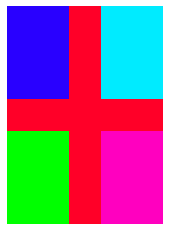

In [ ]:
# let a = green, b = cyan, t = dark blue, u = pink #  
letter_a_block = np.ones((3,2))
letter_b_block = np.full((3, 2), 2)
letter_t_block = np.full((3, 2), 3)
letter_u_block = np.full((3, 2), 4)

block_colour = [0] * len(letters_gameOne)

for i in range(len(letters_gameOne)):
  if letters_gameOne[i] == 0:
    block_colour[i] = letter_a_block
  elif letters_gameOne[i] == 1:
    block_colour[i] = letter_b_block
  elif letters_gameOne[i] == 19:
    block_colour[i] = letter_t_block
  elif letters_gameOne[i] == 20:
    block_colour[i] = letter_u_block 


row1_block = np.concatenate((block_colour[0], game_separator_col, 
                             block_colour[1]), axis=1)
row2_block = np.concatenate((block_colour[2], game_separator_col, 
                             block_colour[3]), axis=1)
game_block_layout = np.concatenate((row1_block, game_separator_row, row2_block),
                                   axis=0)
gameLayout_colRainbowR(game_block_layout)
plt.savefig('game_block_layout.png', bbox_inches='tight', pad_inches = 0)

In [ ]:
# Initialise game, start at 'b' #
# b is index 1 of alpha # 

blocks_list = [block1, block2, block3, block4]

index_b = 1
for i in range(len(letters_gameOne)):
  if np.all(blocks_list[i] == alpha[index_b]):
    start_block = i+1
    print("\033[2;33;40m")
    print("Start at Block", start_block)

# Find end of word, 't' # 
# t is index 19 of alpha # 

index_t = 19
for i in range(len(letters_gameOne)):
  if np.all(blocks_list[i] == alpha[index_t]):
    finish_block = i+1
    print("\033[2;33;40m")
    print("Finish at Block", finish_block)


Start at Block 2

Finish at Block 1


In [ ]:
blocks_OutOfPlay = [(start_block), (finish_block)]
all_blocks = [1, 2, 3, 4]

blocks_ToPlay =list(set(all_blocks).symmetric_difference(set(blocks_OutOfPlay)))
print("\033[2;37;40m")
print("blocks_ToPlay | ", blocks_ToPlay)

# First move to form first word # 
blocks_list_index = ['block1', 'block2', 'block3', 'block4']
print("\033[2;37;40m")
for i in range(0,26,1):
  if np.all(alpha[i] == blocks_list[blocks_ToPlay[0]-1]):
    letter_blockOption1 = alpha_index[i]
    index_blockOption1 = i
    print(blocks_list_index[blocks_ToPlay[0]-1], "is:", letter_blockOption1, 
          " \n index in alpha list: ", index_blockOption1, "\n")
  if np.all(alpha[i] == blocks_list[blocks_ToPlay[1]-1]):
    letter_blockOption2 = alpha_index[i]
    index_blockOption2 = i
    print(blocks_list_index[blocks_ToPlay[1]-1], "is:", letter_blockOption2, 
          " \n index in alpha list: ", index_blockOption2)

print("\033[2;37;40m")
for i in range(0,26,1):
  if letter_list[i] == alpha_index[index_blockOption1]:
    freq_blockOption1_index = i
    print("Letter", letter_blockOption1, "index in letter_list:", i)
  if letter_list[i] == alpha_index[index_blockOption2]:
    freq_blockOption2_index = i 
    print("Letter", letter_blockOption2, "index in letter_list:", i)


blocks_ToPlay |  [3, 4]

block3 is: a  
 index in alpha list:  0 

block4 is: u  
 index in alpha list:  20

Letter a index in letter_list: 1
Letter u index in letter_list: 10


In [ ]:
print("\033[2;37;40m")
if letter_freq[freq_blockOption1_index] > letter_freq[freq_blockOption2_index]:
  first_iter_gameOne = letter_blockOption1
  first_iter_index_gameOne = index_blockOption1
  second_iter_gameOne = letter_blockOption2
  second_iter_index_gameOne = index_blockOption2
  print("First iteration move is to choose letter:", first_iter_gameOne, 
        " | index in alpha list:", first_iter_index_gameOne)  
  print("Second iteration move is to choose letter:", second_iter_gameOne, 
        " | index in alpha list:", second_iter_index_gameOne) 
else:
  first_iter_gameOne = letter_blockOption2
  first_iter_index_gameOne = index_blockOption2
  second_iter_gameOne = letter_blockOption1
  second_iter_index_gameOne = index_blockOption1
  print("First iteration move is to choose letter:", first_iter_gameOne, 
        " | index in alpha list:", first_iter_index_gameOne)  
  print("Second iteration move is to choose letter:", second_iter_gameOne, 
        " | index in alpha list:", second_iter_index_gameOne) 

print("\033[2;33;40m")
for i in range(len(letters_gameOne)):
  if np.all(blocks_list[i] == alpha[first_iter_index_gameOne]):
    first_iter_block_gameOne = i+1
    print("First iteration: after selecting 'b' & 't', go to Block", 
          first_iter_block_gameOne, "to complete the first word")

for i in range(len(letters_gameOne)):
  if np.all(blocks_list[i] == alpha[second_iter_index_gameOne]):
    second_iter_block_gameOne = i+1
    print("Second iteration: after selecting 'b' & 't', go to Block", 
          second_iter_block_gameOne, "to complete the second word")

print("\033[2;37;44m")
# full game sequence # 
print("First iteration of game | Block", start_block, "->", "Block", 
      first_iter_block_gameOne, "->", "Block", finish_block)
print("Second iteration of game | Block", start_block, "->", "Block", 
      second_iter_block_gameOne, "->", "Block", finish_block)


First iteration move is to choose letter: a  | index in alpha list: 0
Second iteration move is to choose letter: u  | index in alpha list: 20

First iteration move after selecting 'b' and 't' is to fill in by going to Block 3
Second iteration move after selecting 'b' and 't' is to fill in by going to Block 4

First iteration of game | Block 2 -> Block 3 -> Block 1
Second iteration of game | Block 2 -> Block 4 -> Block 1


**GAME 2: 'bat' vs 'bet'**

In [ ]:
letters_gameTwo = [0, 1, 4, 19]
random.shuffle(letters_gameTwo)
game_separator_row = np.full((1, 5), -1)
game_separator_col = np.full((3, 1), -1)

row1 = np.concatenate((alpha[letters_gameTwo[0]], game_separator_col, 
                       alpha[letters_gameTwo[1]]), axis=1)
row2 = np.concatenate((alpha[letters_gameTwo[2]], game_separator_col, 
                       alpha[letters_gameTwo[3]]), axis=1)
boggle_gameTwo = np.concatenate((row1, game_separator_row, row2), axis=0)
# print(boggle_gameTwo)
print(boggle_gameTwo.shape)
matrixGrid(boggle_gameTwo)

(7, 5)


,0,1,2,3,4
0,1,0,-1,0,1
1,1,0,-1,1,1
2,0,0,-1,1,0
3,-1,-1,-1,-1,-1
4,1,0,-1,1,0
5,0,0,-1,0,1
6,0,0,-1,0,0


In [ ]:
block1 = boggle_gameTwo[0:3, 0:2]
block2 = boggle_gameTwo[0:3, 3:5]
block3 = boggle_gameTwo[4:7, 0:2]
block4 = boggle_gameTwo[4:7, 3:5]
print(np.all(block1 == alpha[letters_gameTwo[0]]))
print(np.all(block2 == alpha[letters_gameTwo[1]]))
print(np.all(block3 == alpha[letters_gameTwo[2]]))
print(np.all(block4 == alpha[letters_gameTwo[3]]))

True
True
True
True


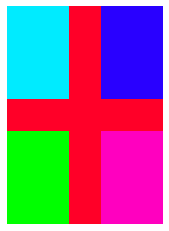

In [ ]:
# let a = green, b = cyan, t = dark blue, u = pink #  
letter_a_block = np.ones((3,2))
letter_b_block = np.full((3, 2), 2)
letter_t_block = np.full((3, 2), 3)
letter_e_block = np.full((3, 2), 4)

block_colour = [0] * len(letters_gameTwo)

for i in range(len(letters_gameTwo)):
  if letters_gameTwo[i] == 0: 
    block_colour[i] = letter_a_block
  elif letters_gameTwo[i] == 1:
    block_colour[i] = letter_b_block
  elif letters_gameTwo[i] == 19:
    block_colour[i] = letter_t_block
  elif letters_gameTwo[i] == 4:
    block_colour[i] = letter_u_block 


row1_block = np.concatenate((block_colour[0], game_separator_col, 
                             block_colour[1]), axis=1)
row2_block = np.concatenate((block_colour[2], game_separator_col, 
                             block_colour[3]), axis=1)
game_block_layout_gameTwo = np.concatenate((row1_block, game_separator_row, 
                                            row2_block), axis=0)
gameLayout_colRainbowR(game_block_layout_gameTwo)
plt.savefig('game_block_layout_gameTwo.png', bbox_inches='tight', 
            pad_inches = 0)

In [ ]:
# Initialise game, start at 'b' #
# b is index 1 of alpha # 

blocks_list = [block1, block2, block3, block4]

index_b = 1
for i in range(len(letters_gameOne)):
  if np.all(blocks_list[i] == alpha[index_b]):
    start_block = i+1
    print("\033[2;33;40m")
    print("Start at Block", start_block)

# Find end of word, 't' # 
# t is index 19 of alpha # 

index_t = 19
for i in range(len(letters_gameOne)):
  if np.all(blocks_list[i] == alpha[index_t]):
    finish_block = i+1
    print("\033[2;33;40m")
    print("Finish at Block", finish_block)


Start at Block 1

Finish at Block 2


In [ ]:
blocks_OutOfPlay = [(start_block), (finish_block)]
all_blocks = [1, 2, 3, 4]

blocks_ToPlay =list(set(all_blocks).symmetric_difference(set(blocks_OutOfPlay)))
print("\033[2;37;40m")
print("blocks_ToPlay | ", blocks_ToPlay)

# First move to form first word # 
blocks_list_index = ['block1', 'block2', 'block3', 'block4']
print("\033[2;37;40m")
for i in range(0,26,1):
  if np.all(alpha[i] == blocks_list[blocks_ToPlay[0]-1]):
    letter_blockOption1 = alpha_index[i]
    index_blockOption1 = i
    print(blocks_list_index[blocks_ToPlay[0]-1], "is:", letter_blockOption1, 
          " \n index in alpha list: ", index_blockOption1, "\n")
  if np.all(alpha[i] == blocks_list[blocks_ToPlay[1]-1]):
    letter_blockOption2 = alpha_index[i]
    index_blockOption2 = i
    print(blocks_list_index[blocks_ToPlay[1]-1], "is:", letter_blockOption2, 
          " \n index in alpha list: ", index_blockOption2)

print("\033[2;37;40m")
for i in range(0,26,1):
  if letter_list[i] == alpha_index[index_blockOption1]:
    freq_blockOption1_index = i
    print("Letter", letter_blockOption1, "index in letter_list:", i)
  if letter_list[i] == alpha_index[index_blockOption2]:
    freq_blockOption2_index = i 
    print("Letter", letter_blockOption2, "index in letter_list:", i)


blocks_ToPlay |  [3, 4]

block3 is: a  
 index in alpha list:  0 

block4 is: e  
 index in alpha list:  4

Letter e index in letter_list: 0
Letter a index in letter_list: 1


In [ ]:
print("\033[2;37;40m")
if letter_freq[freq_blockOption1_index] > letter_freq[freq_blockOption2_index]:
  first_iter_gameTwo = letter_blockOption1
  first_iter_index_gameTwo = index_blockOption1
  second_iter_gameTwo = letter_blockOption2
  second_iter_index_gameTwo = index_blockOption2
  print("First iteration move is to choose letter:", first_iter_gameTwo, 
        " | index in alpha list:", first_iter_index_gameTwo)  
  print("Second iteration move is to choose letter:", second_iter_gameTwo, 
        " | index in alpha list:", second_iter_index_gameTwo) 
else:
  first_iter_gameTwo = letter_blockOption2
  first_iter_index_gameTwo = index_blockOption2
  second_iter_gameTwo = letter_blockOption1
  second_iter_index_gameTwo = index_blockOption1
  print("First iteration move is to choose letter:", first_iter_gameTwo, 
        " | index in alpha list:", first_iter_index_gameTwo)  
  print("Second iteration move is to choose letter:", second_iter_gameTwo, 
        " | index in alpha list:", second_iter_index_gameTwo) 

print("\033[2;33;40m")
for i in range(len(letters_gameTwo)):
  if np.all(blocks_list[i] == alpha[first_iter_index_gameTwo]):
    first_iter_block_gameTwo = i+1
    print("First iteration: after selecting 'b' & 't', go to Block", 
          first_iter_block_gameTwo, "to complete first word")

for i in range(len(letters_gameTwo)):
  if np.all(blocks_list[i] == alpha[second_iter_index_gameTwo]):
    second_iter_block_gameTwo = i+1
    print("Second iteration: after selecting 'b' & 't', go to Block", 
          second_iter_block_gameTwo, "to complete second word")

print("\033[2;37;44m")
# full game sequence # 
print("First iteration of game | Block", start_block, "->", "Block", 
      first_iter_block_gameTwo, "->", "Block", finish_block)
print("Second iteration of game | Block", start_block, "->", "Block", 
      second_iter_block_gameTwo, "->", "Block", finish_block)


First iteration move is to choose letter: e  | index in alpha list: 4
Second iteration move is to choose letter: a  | index in alpha list: 0

First iteration move after selecting 'b' and 't' is to fill in by going to Block 4
Second iteration move after selecting 'b' and 't' is to fill in by going to Block 3

First iteration of game | Block 1 -> Block 4 -> Block 2
Second iteration of game | Block 1 -> Block 3 -> Block 2


**Braille games: linear algebra and machine learning back-end** 

*   Corresponds to ***Section 4*** in dissertation
  *   4.2 Game I:``Complete-the-Braille-Sentence''
        *   4.2.1 One-hot, binary vector encoding approach

In [ ]:
sentence_1 = "Hi, how are you?"
print(sentence_1)

Hi, how are you?


In [ ]:
import re

def remove_noise(input_sentence):
  input_sentence = re.sub("(\,|\?)","", input_sentence)
  return input_sentence

standardise_sentence_1 = remove_noise(sentence_1.lower())
print(standardise_sentence_1)

hi how are you


In [ ]:
import string

tokenized_sentence_1 = standardise_sentence_1.split()
print(tokenized_sentence_1)

['hi', 'how', 'are', 'you']


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(max_tokens = len(tokenized_sentence_1), 
                                       output_mode="multi_hot")
text_vectorization.adapt(tokenized_sentence_1)

In [ ]:
vectorized_sentence_1 = text_vectorization(tokenized_sentence_1)
print(vectorized_sentence_1)

tf.Tensor(
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]], shape=(4, 4), dtype=float32)


In [ ]:
import tracemalloc
tracemalloc.start()

t1 = time.process_time()

complete_sent_Game1 = "Hi, how you"
standardise_complete_sent_Game1 = remove_noise(complete_sent_Game1.lower())
print(standardise_complete_sent_Game1)
tokenized_complete_sent_Game1 = standardise_complete_sent_Game1.split()
print(tokenized_complete_sent_Game1)

t2 = time.process_time()
print('time taken to run:',t2-t1)

print(tracemalloc.get_traced_memory())
tracemalloc.stop()

hi how you
['hi', 'how', 'you']
time taken to run: 0.0016275119999136223
(2789, 13083)


In [ ]:
complete_sent_Game1_matrix = np.zeros(vectorized_sentence_1.shape)
print(complete_sent_Game1_matrix)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
for i in range(len(tokenized_sentence_1)):
  if tokenized_complete_sent_Game1[0] == tokenized_sentence_1[i]:
    print("First word is index number: ", i)
    print("First word is: ", tokenized_sentence_1[i])
    extracted_vector1 = vectorized_sentence_1[:,i]
    print("First word vector: ", extracted_vector1)
    complete_sent_Game1_matrix[:,i] = extracted_vector1
    print(complete_sent_Game1_matrix)

First word is index number:  0
First word is:  hi
First word vector:  tf.Tensor([0. 0. 1. 0.], shape=(4,), dtype=float32)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
for j in range(1, len(tokenized_complete_sent_Game1)):
  for i in range(len(tokenized_sentence_1)):
    if tokenized_complete_sent_Game1[j] == tokenized_sentence_1[i]:
      print("Next word is index number: ", i)
      print("Next word is: ", tokenized_sentence_1[i])
      extracted_vector = vectorized_sentence_1[:,i]
      print("Next word vector: ", extracted_vector)
      complete_sent_Game1_matrix[:,i] = extracted_vector
print(complete_sent_Game1_matrix)

Next word is index number:  1
Next word is:  how
Next word vector:  tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)
Next word is index number:  3
Next word is:  you
Next word vector:  tf.Tensor([1. 0. 0. 0.], shape=(4,), dtype=float32)
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [ ]:
missing_word_vec = np.zeros(4)
print(missing_word_vec)

for i in range(len(tokenized_sentence_1)):
  if np.all(missing_word_vec == complete_sent_Game1_matrix[:,i]):
    print("index in sentence missing: ", i)
    print("missing word: ", tokenized_sentence_1[i])

[0. 0. 0. 0.]
index in sentence missing:  2
missing word:  are


*   Corresponds to ***Section 4*** in dissertation
  *   4.2 Game I:``Complete-the-Braille-Sentence''
        *   4.2.3 Leveraging self-attention matrices in NLP


In [ ]:
tokenized_sentence_1

['hi', 'how', 'are', 'you']

In [ ]:
self_attention_matrix = np.array([[1, 0.8, 0.6, 0.4], [0.8, 1, 0.8, 0.6], 
                                  [0.6, 0.8, 1, 0.8], [0.4, 0.6, 0.8, 1]])
print("\033[1;30;47m Self-Attention Matrix: ")
matrixGridRoundCol(self_attention_matrix)

 Self-Attention Matrix: 


,0,1,2,3
0,1.000000,0.800000,0.600000,0.400000
1,0.800000,1.000000,0.800000,0.600000
2,0.600000,0.800000,1.000000,0.800000
3,0.400000,0.600000,0.800000,1.000000


In [ ]:
# If First word is missing 
missing_word = tokenized_sentence_1[0]
print("missing word: ", missing_word)

for i in range(len(tokenized_sentence_1)):
  highest_sim = max(self_attention_matrix[[1,2,3],0])
  if self_attention_matrix[i, 0] == highest_sim:
    print("conext word index: ", i)
    print("context word : ", tokenized_sentence_1[i])

missing word:  hi
conext word index:  1
context word :  how


In [ ]:
# If Second word is missing

missing_word = tokenized_sentence_1[1]
print("missing word: ", missing_word)

for i in range(len(tokenized_sentence_1)):
  highest_sim = max(self_attention_matrix[[0,2,3],1])
  if self_attention_matrix[i, 1] == highest_sim:
    print("conext word index: ", i)
    print("context word : ", tokenized_sentence_1[i])

missing word:  how
conext word index:  0
context word :  hi
conext word index:  2
context word :  are


In [ ]:
# If Third word is missing

missing_word = tokenized_sentence_1[2]
print("missing word: ", missing_word)

for i in range(len(tokenized_sentence_1)):
  highest_sim = max(self_attention_matrix[[0,1,3],2])
  if self_attention_matrix[i, 2] == highest_sim:
    print("conext word index: ", i)
    print("context word : ", tokenized_sentence_1[i])

missing word:  are
conext word index:  1
context word :  how
conext word index:  3
context word :  you


In [ ]:
# If Last word is missing
missing_word = tokenized_sentence_1[3]
print("missing word: ", missing_word)

for i in range(len(tokenized_sentence_1)):
  highest_sim = max(self_attention_matrix[[0,1,2],3])
  if self_attention_matrix[i, 3] == highest_sim:
    print("conext word index: ", i)
    print("context word : ", tokenized_sentence_1[i])

missing word:  you
conext word index:  2
context word :  are


*   Corresponds to ***Section 4*** in dissertation
  *   4.2 Game I:``Complete-the-Braille-Sentence''
        *   4.2.2 Using Google's Word2Vec model: Skip-grams method


In [ ]:
"""https://www.tensorflow.org/tutorials/text/word2vec#vectorize_
                                                      sentences_from_the_corpus
"""
import io
import re
import string
import tqdm

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
tokens = tokenized_sentence_1
print(len(tokens))

4


In [ ]:
vocab, index = {}, 1  # start indexing from 1
vocab['<pad>'] = 0  # add a padding token
for token in tokens:
  if token not in vocab:
    vocab[token] = index
    index += 1
vocab_size = len(vocab)
print(vocab)

{'<pad>': 0, 'hi': 1, 'how': 2, 'are': 3, 'you': 4}


In [ ]:
inverse_vocab = {index: token for token, index in vocab.items()}
print(inverse_vocab)

{0: '<pad>', 1: 'hi', 2: 'how', 3: 'are', 4: 'you'}


In [ ]:
example_sequence = [vocab[word] for word in tokens]
print(example_sequence)

[1, 2, 3, 4]


In [ ]:
window_size = 1
positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(
      example_sequence,
      vocabulary_size=vocab_size,
      window_size=window_size,
      negative_samples=0)
print(len(positive_skip_grams))

6


In [ ]:
for target, context in positive_skip_grams:
  print(f"({target},{context}):({inverse_vocab[target]},{inverse_vocab[context]})")

(1, 2): (hi, how)
(2, 3): (how, are)
(2, 1): (how, hi)
(3, 2): (are, how)
(3, 4): (are, you)
(4, 3): (you, are)


In [ ]:
# If First word = missing 
checkerFirstWord_1 = 0      # uses skip-gram (hi, how) 

# If Second word = missing
checkerSecondWord_1 = 1     # uses skip-gram (how, are)
checkerSecondWord_2 = 2     # uses skip-gram (how, hi)

# If Third word = missing
checkerThirdWord_1 = 3      # uses skip-gram (are, how)
checkerThirdWord_2 = 4      # uses skip-gram (are, you)

# If Last word = missing
checkerLastWord_1 = 5       # uses skip-gram (you, are)

In [ ]:
# Get target and context words for one positive skip-gram.
target_word, context_word = positive_skip_grams[checkerLastWord_1]

# Set the number of negative samples per positive context.
num_ns = 4

context_class = tf.reshape(tf.constant(context_word, dtype="int64"), (1, 1))
negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
    true_classes=context_class,  # class that should be sampled as 'positive'
    num_true=1,  # each positive skip-gram has 1 positive context class
    num_sampled=num_ns,  # number of negative context words to sample
    unique=True,  # all the negative samples should be unique
    range_max=vocab_size,  # pick index of the samples from [0, vocab_size]
    seed=SEED,  # seed for reproducibility
    name="negative_sampling"  # name of this operation
)
print(negative_sampling_candidates)
print([inverse_vocab[index.numpy()] for index in negative_sampling_candidates])

tf.Tensor([1 0 2 3], shape=(4,), dtype=int64)
['hi', '<pad>', 'how', 'are']


In [ ]:
# Add dimension so you can use concatenation (in next step)
negative_sampling_candidates = tf.expand_dims(negative_sampling_candidates, 1)

# Concatenate a positive context word with negative sampled words
context = tf.concat([context_class, negative_sampling_candidates], 0)

# Label first context word as `1` (positive) then `num_ns` `0`s (negative)
label = tf.constant([1] + [0]*num_ns, dtype="int64")

# Reshape target to shape `(1,)` and context + label to `(num_ns+1,)`
target = tf.squeeze(target_word)
context = tf.squeeze(context)
label = tf.squeeze(label)

In [ ]:
print(f"target_index    : {target}")
print(f"target_word     : {inverse_vocab[target_word]}")
print(f"context_indices : {context}")
print(f"context_words   : {[inverse_vocab[c.numpy()] for c in context]}")
print(f"label           : {label}")

target_index    : 4
target_word     : you
context_indices : [3 1 0 2 3]
context_words   : ['are', 'hi', '<pad>', 'how', 'are']
label           : [1 0 0 0 0]


In [ ]:
print("target  :", target)
print("context :", context)
print("label   :", label)

target  : tf.Tensor(4, shape=(), dtype=int32)
context : tf.Tensor([3 1 0 2 3], shape=(5,), dtype=int64)
label   : tf.Tensor([1 0 0 0 0], shape=(5,), dtype=int64)


*   Corresponds to ***Section 4*** in dissertation
    *   4.3 Leveraging Facebook's Fasttext Model
        *   4.3.1 Game II: Animals vs Shapes (pre-trained embeddings), print 2D shapes via linear systems

Which word is the *odd* one?

In [ ]:
import gensim.downloader as api

In [ ]:
# download pre-trained world embeddings: fasttext
# built on large corpuses of common text data 
fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
animals_list = ['tiger', 'fox', 'dog', 'cat']
shapes_list = ['circle', 'triangle', 'square', 'rectangle']

In [ ]:
import random

if len(animals_list) == len(shapes_list):
  rand_index = random.randint(0, len(animals_list)-1)
  print("OK: proceed")
else:
  print("WARNING: lists not same length")

OK: proceed


In [ ]:
# Which word from the given list doesn't go with the others?
game_s_1 = ['tiger', 'fox', 'dog', 'cat', shapes_list[rand_index]]
odd_word_1 = fasttext_model300.doesnt_match(game_s_1)
print(odd_word_1)  

triangle


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
# Which word from the given list doesn't go with the others?
game_s_2 =['triangle', 'square', 'circle', 'rectangle',animals_list[rand_index]]
odd_word_2 = fasttext_model300.doesnt_match(game_s_2) 
print(odd_word_2)  

fox


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
# convert game_s_1, game_s_2, odd_word_1, odd_word_2 to braille as shown before
# under game_s_1 print the shape to teach kid

Print 2D shapes using linear algebra back-end 

First vertex of triangle: 
 x1 =  10.0  | y1 =  10.0 

Second vertex of triangle: 
 x2 =  2.0  | y2 =  2.0 

Third vertex of triangle: 
 x3 =  18.0  | y3 =  2.0


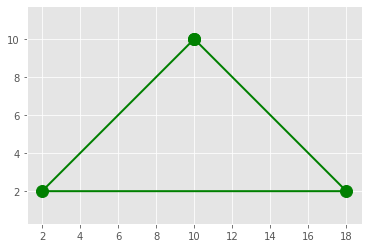

In [ ]:
# Triangle via NLA
# EQUATION 1: x - y = 0
# EQUATION 2: x + y = 20
# EQUATION 3:     y = 2

A_1 = np.array([[1, -1], [1, 1]])
b_1 = np.array([0, 20])
x_1 = np.linalg.solve(A_1, b_1)
x1, y1 = x_1
print("First vertex of triangle: \n x1 = ", x1, " | y1 = ", y1, "\n")

A_2 = np.array([[1, -1], [0, 1]])
b_2 = np.array([0, 2])
x_2 = np.linalg.solve(A_2, b_2)
x2, y2 = x_2
print("Second vertex of triangle: \n x2 = ", x2, " | y2 = ", y2, "\n")

A_3 = np.array([[1, 1], [0, 1]])
b_3 = np.array([20, 2])
x_3 = np.linalg.solve(A_3, b_3)
x3, y3 = x_3
print("Third vertex of triangle: \n x3 = ", x3, " | y3 = ", y3)

triangle = plt.figure()

x = [x1, x2, x3, x1]
y = [y1, y2, y3, y1]

plt.plot(x, y, 'go-', linewidth=2, markersize=12)
plt.axis("equal")
plt.savefig('triangle.png')
plt.show()

Equation of circle: x^2 + y^2 = 1


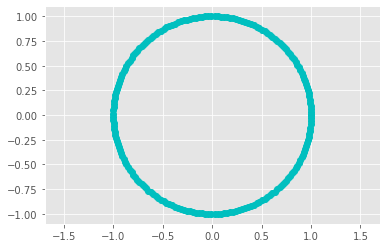

In [ ]:
# Circle via LA
# EQUATION 1: x^2 + y^2 - 1 = 0

# Use NLA to derive x, y equation 
# let x = 2 and y = 4, should be 2^2 + 4^2 - 1 = 19

x = 2
x_squared = 2**2
y = 4
y_squared = 4**2 

y_vector = np.array([1, y, y_squared])
constants_vector = np.array([[-1, 0, 1], [0, 0, 0], [1, 0, 0]])
x_vector = np.array([[1], [x], [x_squared]])
circle_eq_step1 = np.matmul(y_vector, constants_vector)
circle_eq_full = np.matmul(circle_eq_step1, x_vector)

if circle_eq_full == (2**2 + 4**2 - 1):
  print("Equation of circle: x^2 + y^2 = 1")

# transform to polar coordinates 

circle = plt.figure()

phi = np.linspace(0, 2*np.pi, 200)
r = 1
x = r*np.cos(phi)
y = r*np.sin(phi)

plt.plot(x, y, 'co-')
plt.axis("equal")
plt.savefig('circle.png')
plt.show()

First vertex of square: 
 x1 =  2.0  | y1 =  2.0 

Second vertex of square: 
 x2 =  2.0  | y2 =  20.0 

Third vertex of square: 
 x3 =  20.0  | y3 =  20.0 
 
Fourth vertex of square: 
 x4 =  20.0  | y4 =  2.0


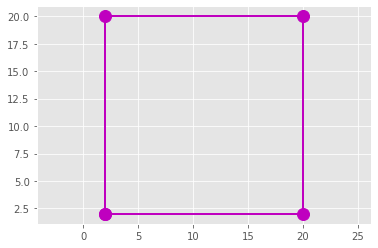

In [ ]:
# Square via NLA
# EQUATION 1: x = 2
# EQUATION 2: x = 20
# EQUATION 3: y = 20
# EQUATION 4: y = 2

A_1 = np.identity(2)
b_1 = np.array([2, 2])
x_1 = np.linalg.solve(A_1, b_1)
x1, y1 = x_1
print("First vertex of square: \n x1 = ", x1, " | y1 = ", y1, "\n")

A_2 = np.identity(2)
b_2 = np.array([2, 20])
x_2 = np.linalg.solve(A_2, b_2)
x2, y2 = x_2
print("Second vertex of square: \n x2 = ", x2, " | y2 = ", y2, "\n")

A_3 = np.identity(2)
b_3 = np.array([20, 20])
x_3 = np.linalg.solve(A_3, b_3)
x3, y3 = x_3
print("Third vertex of square: \n x3 = ", x3, " | y3 = ", y3, "\n ")

A_4 = np.identity(2)
b_4 = np.array([20, 2])
x_4 = np.linalg.solve(A_4, b_4)
x4, y4 = x_4
print("Fourth vertex of square: \n x4 = ", x4, " | y4 = ", y4)

square = plt.figure()

x = [x1, x2, x3, x4, x1]
y = [y1, y2, y3, y4, y1]

plt.plot(x, y, 'mo-', linewidth=2, markersize=12)
plt.axis("equal")
plt.savefig('square.png')
plt.show()

First vertex of rectangle: 
 x1 =  2.0  | y1 =  2.0 

Second vertex of rectangle: 
 x2 =  2.0  | y2 =  20.0 

Third vertex of rectangle: 
 x3 =  40.0  | y3 =  20.0 
 
Fourth vertex of rectangle: 
 x4 =  40.0  | y4 =  2.0


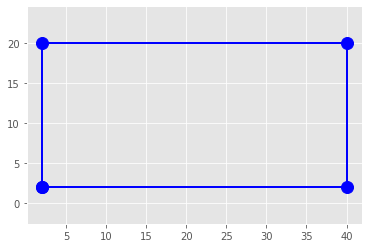

In [ ]:
# Rectangle via NLA
# EQUATION 1: x = 2
# EQUATION 2: x = 40
# EQUATION 3: y = 20
# EQUATION 4: y = 2

A_1 = np.identity(2)
b_1 = np.array([2, 2])
x_1 = np.linalg.solve(A_1, b_1)
x1, y1 = x_1
print("First vertex of rectangle: \n x1 = ", x1, " | y1 = ", y1, "\n")

A_2 = np.identity(2)
b_2 = np.array([2, 20])
x_2 = np.linalg.solve(A_2, b_2)
x2, y2 = x_2
print("Second vertex of rectangle: \n x2 = ", x2, " | y2 = ", y2, "\n")

A_3 = np.identity(2)
b_3 = np.array([40, 20])
x_3 = np.linalg.solve(A_3, b_3)
x3, y3 = x_3
print("Third vertex of rectangle: \n x3 = ", x3, " | y3 = ", y3, "\n ")

A_4 = np.identity(2)
b_4 = np.array([40, 2])
x_4 = np.linalg.solve(A_4, b_4)
x4, y4 = x_4
print("Fourth vertex of rectangle: \n x4 = ", x4, " | y4 = ", y4)

rectangle = plt.figure()

x = [x1, x2, x3, x4, x1]
y = [y1, y2, y3, y4, y1]

plt.plot(x, y, 'bo-', linewidth=2, markersize=12)
plt.axis("equal")
plt.savefig('rectangle.png')
plt.show()

*   Corresponds to ***Section 4*** in dissertation
    *   4.3 Leveraging Facebook's Fasttext Model
        *   4.3.2 Game III: Learn common English synonyms

In [ ]:
fasttext_model300.most_similar(positive="lovely", topn=2)

[('beautiful', 0.870550811290741), ('gorgeous', 0.8430044054985046)]

In [ ]:
# compute cosine disances from given word or vector to all words in other vector
print(fasttext_model300.distances('lovely', ['beautiful', 'gorgeous', 
                                             'distasteful'])) 

[0.12944931 0.1569956  0.41322458]


In [ ]:
# compute cosine similarities (orthogonal)
print(fasttext_model300.cosine_similarities(fasttext_model300['lovely'], 
    vectors_all=(fasttext_model300['beautiful'], fasttext_model300['gorgeous'], 
                   fasttext_model300['distasteful'])))  

[0.8705507 0.8430044 0.5867754]


In [ ]:
fasttext_model300.wv['lovely']

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving questions-words.txt to questions-words.txt


In [ ]:
# fasttext_accuracy
fasttext_model300.evaluate_word_analogies(analogies="questions-words.txt")[0]

0.8827876424099353

*   Corresponds to ***Section 4*** in dissertation
    *   4.3 Leveraging Facebook's Fasttext Model
        *   4.3.3 Game IV: Braille trivia ``Guess the City/Country!"

In [ ]:
def pp(obj):
    print(pd.DataFrame(obj))
    
def analogy(worda, wordb, wordc):
    result = fasttext_model300.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]

countries = ['Greece', 'Canada', 'Germany', 'Egypt', 'Japan', 'Armenia']
cities = [analogy('France', 'Paris', country) for country in countries]
pp(zip(countries, cities))

         0        1
0   Greece   Athens
1   Canada  Toronto
2  Germany   Berlin
3    Egypt    Cairo
4    Japan    Tokyo
5  Armenia  Yerevan


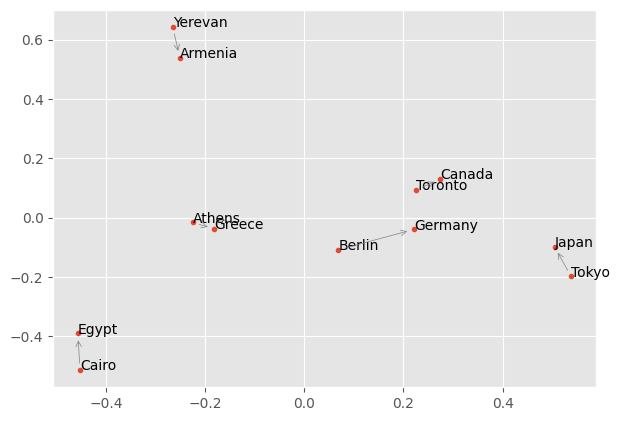

In [ ]:
from sklearn.decomposition import PCA

def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)//2):
        plt.annotate("", xy=data[i], xytext=data[i+len(data)//2], 
                     arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.")
                )
               
labels = countries + cities
data = [fasttext_model300[w] for w in labels]
plot_data(data, labels)

*   Corresponds to ***Section 5*** in dissertation
    *   5 Conclusion and Future Work 
          *   More advanced ML powered word games + how to translate to Braille

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
s1 = "I enjoy learning"
s2 = "I love chocolate"
s3 = "We are friends"
s4 = "You taste food"

tokens_s1 = nltk.word_tokenize(s1)
tokens_s2 = nltk.word_tokenize(s2)
tokens_s3 = nltk.word_tokenize(s3)
tokens_s4 = nltk.word_tokenize(s4)

In [ ]:
tags_s1 = nltk.pos_tag(tokens_s1)
print(tags_s1)
tags_s2 = nltk.pos_tag(tokens_s2)
print(tags_s2)
tags_s3 = nltk.pos_tag(tokens_s3)
print(tags_s3)
tags_s4 = nltk.pos_tag(tokens_s4)
print(tags_s4)

[('I', 'PRP'), ('enjoy', 'VBP'), ('learning', 'VBG')]
[('I', 'PRP'), ('love', 'VBP'), ('chocolate', 'NN')]
[('We', 'PRP'), ('are', 'VBP'), ('friends', 'NNS')]
[('You', 'PRP'), ('taste', 'VBP'), ('food', 'NN')]


In [ ]:
nltk.help.upenn_tagset("VBG")

VBG: verb, present participle or gerund
    telegraphing stirring focusing angering judging stalling lactating
    hankerin' alleging veering capping approaching traveling besieging
    encrypting interrupting erasing wincing ...


In [ ]:
# Example of how it would be converted to Braille #

tags_s1_extracted = [[tuple(l.split()) for l in list] for list in tags_s1]
print(tags_s1_extracted)

[[('I',), ('PRP',)], [('enjoy',), ('VBP',)], [('learning',), ('VBG',)]]


In [ ]:
len_first_word = len(tags_s1_extracted[0][0][0])
len_first_tag = len(tags_s1_extracted[0][1][0])
first_word = [0]*len_first_word
first_tag = [0]*len_first_tag

len_second_word = len(tags_s1_extracted[1][0][0])
len_second_tag = len(tags_s1_extracted[1][1][0])
second_word = [0]*len_second_word
second_tag = [0]*len_second_tag

len_third_word = len(tags_s1_extracted[2][0][0])
len_third_tag = len(tags_s1_extracted[2][1][0])
third_word = [0]*len_third_word
third_tag = [0]*len_third_tag

for i in range(len_first_word):
  first_word[i] = (tags_s1_extracted[0][0][0][i])
print(first_word)
for i in range(len_first_tag):
  first_tag[i] = (tags_s1_extracted[0][1][0][i])
print(first_tag)

for i in range(len_second_word):
  second_word[i] = (tags_s1_extracted[1][0][0][i])
print(second_word)
for i in range(len_second_tag):
  second_tag[i] = (tags_s1_extracted[1][1][0][i])
print(second_tag)

for i in range(len_third_word):
  third_word[i] = (tags_s1_extracted[2][0][0][i])
print(third_word)
for i in range(len_third_tag):
  third_tag[i] = (tags_s1_extracted[2][1][0][i])
print(third_tag)

['I']
['P', 'R', 'P']
['e', 'n', 'j', 'o', 'y']
['V', 'B', 'P']
['l', 'e', 'a', 'r', 'n', 'i', 'n', 'g']
['V', 'B', 'G']


In [ ]:
# Printing Braille form # 
for j in range(len_first_word):  # sample how to extract first word and its tag
  for i in range(0,26,1):
    if first_word[j] == alpha_capital_index[i]:
      print("first word Alphabet, letter #", j+1," : \n",alpha_capital_index[i])
      print("first word Braille , letter #", j+1," : \n",alpha_capital[i], "\n")
    elif first_word[j] == alpha_index[i]:
      print("first word Alphabet, letter #", j+1, " : \n", alpha_index[i])
      print("first word Braille, letter #", j+1, " : \n", alpha[i], "\n")

for j in range(len_first_tag):   
  for i in range(0,26,1):
    if first_tag[j] == alpha_capital_index[i]:
      print("first tag Alphabet, letter #", j+1, " : \n",alpha_capital_index[i])
      print("first tag Braille, letter #", j+1, " : \n", alpha_capital[i], "\n")
    elif first_tag[j] == alpha_index[i]:
      print("first tag Alphabet, letter #", j+1, " : \n", alpha_index[i])
      print("first tag Braille, letter #", j+1, " : \n", alpha[i], "\n")

# next step is to concatenate braille matrices for each word and tag separately

first word Alphabet, letter # 1  : 
 I
first word Braille , letter # 1  : 
 [[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]] 

first tag Alphabet, letter # 1  : 
 P
first tag Braille, letter # 1  : 
 [[0 0 1 1]
 [0 0 1 0]
 [0 1 1 0]] 

first tag Alphabet, letter # 2  : 
 R
first tag Braille, letter # 2  : 
 [[0 0 1 0]
 [0 0 1 1]
 [0 1 1 0]] 

first tag Alphabet, letter # 3  : 
 P
first tag Braille, letter # 3  : 
 [[0 0 1 1]
 [0 0 1 0]
 [0 1 1 0]] 



In [ ]:
for j in range(len_second_word): # sample how to extract second word and its tag
  for i in range(0,26,1):
    if second_word[j] == alpha_capital_index[i]:
      print("second word Alphabet, letter #",j+1, ": \n",alpha_capital_index[i])
      print("second word Braille , letter #",j+1, ": \n",alpha_capital[i], "\n")
    elif second_word[j] == alpha_index[i]:
      print("second word Alphabet, letter #", j+1, " : \n", alpha_index[i])
      print("second word Braille, letter #", j+1, " : \n", alpha[i], "\n")

for j in range(len_second_tag):   
  for i in range(0,26,1):
    if second_tag[j] == alpha_capital_index[i]:
      print("second tag Alphabet, letter #",j+1, " : \n",alpha_capital_index[i])
      print("second tag Braille, letter #", j+1, " : \n",alpha_capital[i], "\n")
    elif second_tag[j] == alpha_index[i]:
      print("second tag Alphabet, letter #", j+1, " : \n", alpha_index[i])
      print("second tag Braille, letter #", j+1, " : \n", alpha[i], "\n")

# next step is to concatenate braille matrices for each word and tag separately

second word Alphabet, letter # 1  : 
 e
second word Braille, letter # 1  : 
 [[1 0]
 [0 1]
 [0 0]] 

second word Alphabet, letter # 2  : 
 n
second word Braille, letter # 2  : 
 [[1 1]
 [0 1]
 [1 0]] 

second word Alphabet, letter # 3  : 
 j
second word Braille, letter # 3  : 
 [[0 1]
 [1 1]
 [0 0]] 

second word Alphabet, letter # 4  : 
 o
second word Braille, letter # 4  : 
 [[1 0]
 [0 1]
 [1 0]] 

second word Alphabet, letter # 5  : 
 y
second word Braille, letter # 5  : 
 [[1 1]
 [0 1]
 [1 1]] 

second tag Alphabet, letter # 1  : 
 V
second tag Braille, letter # 1  : 
 [[0 0 1 0]
 [0 0 1 0]
 [0 1 1 1]] 

second tag Alphabet, letter # 2  : 
 B
second tag Braille, letter # 2  : 
 [[0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]] 

second tag Alphabet, letter # 3  : 
 P
second tag Braille, letter # 3  : 
 [[0 0 1 1]
 [0 0 1 0]
 [0 1 1 0]] 



In [ ]:
for j in range(len_third_word): # sample how to extract third word and its tag
  for i in range(0,26,1):
    if third_word[j] == alpha_capital_index[i]:
      print("third word Alphabet, letter #",j+1, " : \n",alpha_capital_index[i])
      print("third word Braille , letter #",j+1, " : \n",alpha_capital[i], "\n")
    elif third_word[j] == alpha_index[i]:
      print("third word Alphabet, letter #", j+1, " : \n", alpha_index[i])
      print("third word Braille, letter #", j+1, " : \n", alpha[i], "\n")

for j in range(len_third_tag):   
  for i in range(0,26,1):
    if third_tag[j] == alpha_capital_index[i]:
      print("third tag Alphabet, letter #", j+1, " : \n",alpha_capital_index[i])
      print("third tag Braille, letter #", j+1, " : \n", alpha_capital[i], "\n")
    elif third_tag[j] == alpha_index[i]:
      print("third tag Alphabet, letter #", j+1, " : \n", alpha_index[i])
      print("third tag Braille, letter #", j+1, " : \n", alpha[i], "\n")


# next step is to concatenate braille matrices for each word and tag separately

third word Alphabet, letter # 1  : 
 l
third word Braille, letter # 1  : 
 [[1 0]
 [1 0]
 [1 0]] 

third word Alphabet, letter # 2  : 
 e
third word Braille, letter # 2  : 
 [[1 0]
 [0 1]
 [0 0]] 

third word Alphabet, letter # 3  : 
 a
third word Braille, letter # 3  : 
 [[1 0]
 [0 0]
 [0 0]] 

third word Alphabet, letter # 4  : 
 r
third word Braille, letter # 4  : 
 [[1 0]
 [1 1]
 [1 0]] 

third word Alphabet, letter # 5  : 
 n
third word Braille, letter # 5  : 
 [[1 1]
 [0 1]
 [1 0]] 

third word Alphabet, letter # 6  : 
 i
third word Braille, letter # 6  : 
 [[0 1]
 [1 0]
 [0 0]] 

third word Alphabet, letter # 7  : 
 n
third word Braille, letter # 7  : 
 [[1 1]
 [0 1]
 [1 0]] 

third word Alphabet, letter # 8  : 
 g
third word Braille, letter # 8  : 
 [[1 1]
 [1 1]
 [0 0]] 

third tag Alphabet, letter # 1  : 
 V
third tag Braille, letter # 1  : 
 [[0 0 1 0]
 [0 0 1 0]
 [0 1 1 1]] 

third tag Alphabet, letter # 2  : 
 B
third tag Braille, letter # 2  : 
 [[0 0 1 0]
 [0 0 1 0]
 [0 